In [1]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from sklearn.metrics import *
import collections
from copy import deepcopy
pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))

In [2]:
result_date = '20220914'
## config for various kinds of graphs

gconfigs = {
    'barplot': {'color': 'blue', 'linestyle': '-.', 'marker': '.', 'alpha': 0.5}
}


#Percentile calculations
def perc_75(x): return np.percentile(x, 75)


def perc_25(x): return np.percentile(x, 25)


#Set default RC parameters
notebook_default_rcparams = {
    "axes.titlesize": 32,
    "axes.labelsize": 60,
    "legend.fontsize": 60,
    "legend.title_fontsize": 60,
    "xtick.labelsize": 60,
    "ytick.labelsize": 60,
    "axes.grid": True,
    "legend.framealpha": 0.5,
    "lines.linewidth": 5,
    "legend.loc": 'upper left'

}
rcParams.update(notebook_default_rcparams)

# Standardized Labels

EPSILON = 2e-2
#plotting dir


plotting_dir = f'plots/{datetime.now().strftime("%Y%m%d")}'
if not os.path.exists(plotting_dir):
    os.makedirs(plotting_dir)
result_dir = f'results/{result_date}'

# RQ 1a: Plots for overall dataset metrics

In [3]:
rq1a_experiments = ['extrasensory_5_1_TAE', 'extrasensory_10_1_TAE', 'extrasensory_30_3_TAE', 'extrasensory_60_6_TAE','casas_5_1_TAE', 'casas_10_1_TAE', 'casas_30_3_TAE', 'casas_60_6_TAE']

rq1a_exp = rq1a_experiments[0]
exp_dir = f"{result_dir}/{rq1a_exp}"


In [4]:
exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
exp_dataset = rq1a_exp.split("_")[0]
exp_lag = str(rq1a_exp.split("_")[1])+' mins'
df_exp_overall['dataset'] = exp_dataset
df_exp_overall['lag'] = exp_lag
df_exp_overall

,pipeline,F1-Score,Precision,Recall,Jaccard,dataset,lag
0,onto,63.18,70.51,61.05,57.21,extrasensory,5 mins
1,temporal,72.33,77.34,75.51,76.85,extrasensory,5 mins
2,combined,70.91,69.39,80.37,69.00,extrasensory,5 mins


In [5]:
df_rq1a = None
for rq1a_exp in rq1a_experiments:
    exp_dir = f"{result_dir}/{rq1a_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_dataset = rq1a_exp.split("_")[0]
    exp_lag = str(rq1a_exp.split("_")[1])+' mins'
    df_exp_overall['dataset'] = exp_dataset
    df_exp_overall['lag'] = exp_lag
    if df_rq1a is None:
        df_rq1a = df_exp_overall.copy(deep=True)
    else:
        df_rq1a = pd.concat([df_rq1a,df_exp_overall],ignore_index=True)
df_rq1a.info()
df_rq1a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pipeline   24 non-null     object 
 1   F1-Score   24 non-null     float64
 2   Precision  24 non-null     float64
 3   Recall     24 non-null     float64
 4   Jaccard    24 non-null     float64
 5   dataset    24 non-null     object 
 6   lag        24 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.4+ KB


,pipeline,F1-Score,Precision,Recall,Jaccard,dataset,lag
0,onto,63.18,70.51,61.05,57.21,extrasensory,5 mins
1,temporal,72.33,77.34,75.51,76.85,extrasensory,5 mins
2,combined,70.91,69.39,80.37,69.00,extrasensory,5 mins
3,onto,63.19,70.52,61.06,57.22,extrasensory,10 mins
4,temporal,74.43,73.67,79.07,75.18,extrasensory,10 mins


In [6]:
df_rq1a['dataset_lag'] = df_rq1a['dataset']+'-'+df_rq1a['lag']

df_rq1a

,pipeline,F1-Score,Precision,Recall,Jaccard,dataset,lag,dataset_lag
0,onto,63.18,70.51,61.05,57.21,extrasensory,5 mins,extrasensory-5 mins
1,temporal,72.33,77.34,75.51,76.85,extrasensory,5 mins,extrasensory-5 mins
2,combined,70.91,69.39,80.37,69.00,extrasensory,5 mins,extrasensory-5 mins
3,onto,63.19,70.52,61.06,57.22,extrasensory,10 mins,extrasensory-10 mins
4,temporal,74.43,73.67,79.07,75.18,extrasensory,10 mins,extrasensory-10 mins
5,combined,69.31,63.01,82.36,67.02,extrasensory,10 mins,extrasensory-10 mins
6,onto,63.24,70.49,61.12,57.28,extrasensory,30 mins,extrasensory-30 mins
7,temporal,29.46,22.95,46.20,46.52,extrasensory,30 mins,extrasensory-30 mins
8,combined,51.44,46.61,68.93,49.74,extrasensory,30 mins,extrasensory-30 mins
9,onto,63.19,70.54,61.02,57.20,extrasensory,60 mins,extrasensory-60 mins


In [7]:
pal = sns.color_palette()
print(pal.as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


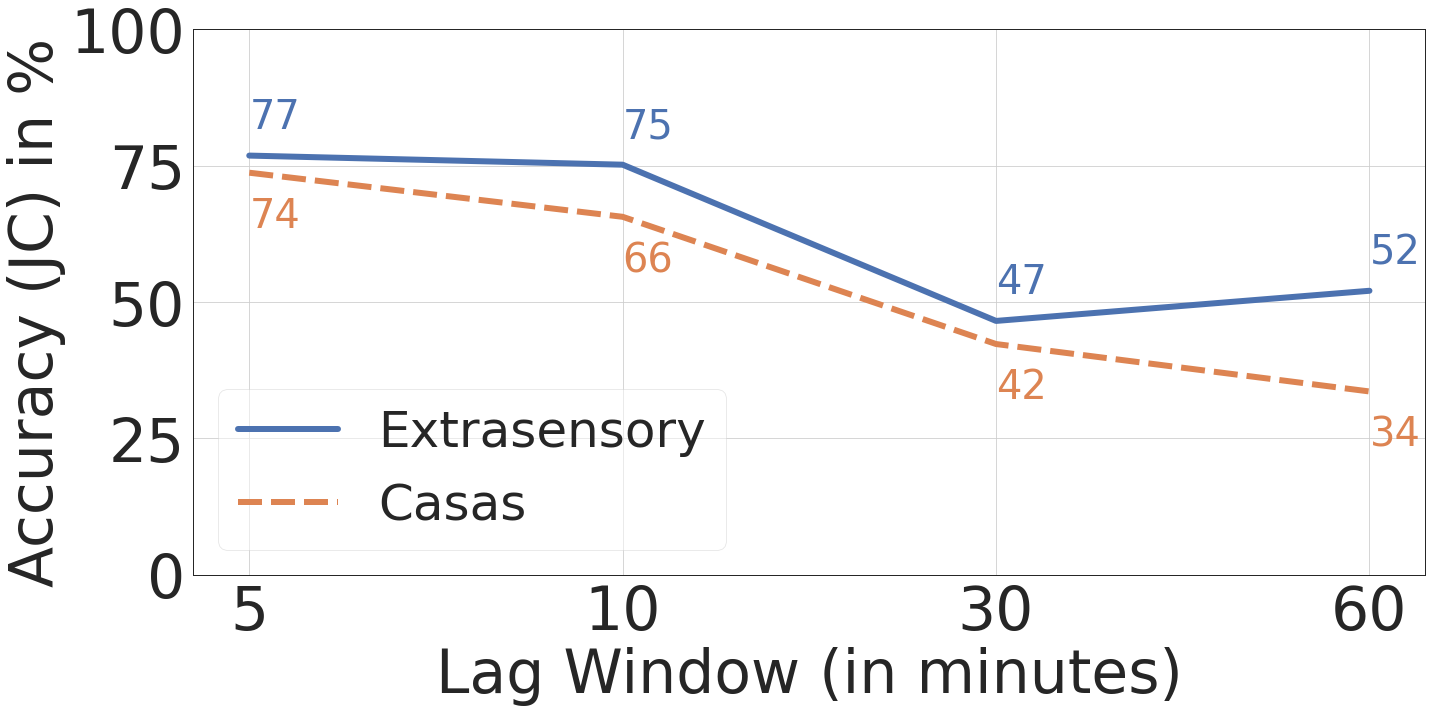

In [8]:
df_rq1a = df_rq1a[df_rq1a.pipeline=='temporal']
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_rq1a,x='lag',y='Jaccard', style='dataset',hue='dataset',linewidth=6)
plt.xticks((0,1,2,3),(5,10,30,60))
plt.ylabel('Accuracy (JC) in % ')
plt.xlabel('Lag Window (in minutes)')
plt.legend(loc='lower left', labels=['Extrasensory','Casas'], fontsize=50)
plt.ylim(0,100)

# label points on the plot

for x, y in zip(df_rq1a[df_rq1a.dataset=='extrasensory']['lag'], df_rq1a[df_rq1a.dataset=='extrasensory']['Jaccard']):
    plt.text(x = x, # x-coordinate position of data label
             y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
             s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                          color = '#4c72b0', size=40) # set colour of line


for x, y in zip(df_rq1a[df_rq1a.dataset=='casas']['lag'], df_rq1a[df_rq1a.dataset=='casas']['Jaccard']):
    plt.text(x = x, # x-coordinate position of data label
             y = y-10, # y-coordinate position of data label, adjusted to be 150 below the data point
             s = "{:.0f}".format(y), # data label, formatted to ignore decimals
             color = '#dd8452', size=40) # set colour of line
# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/rq1a_jaccard_temporal_lag.pdf", dpi=400, bbox_inches='tight')

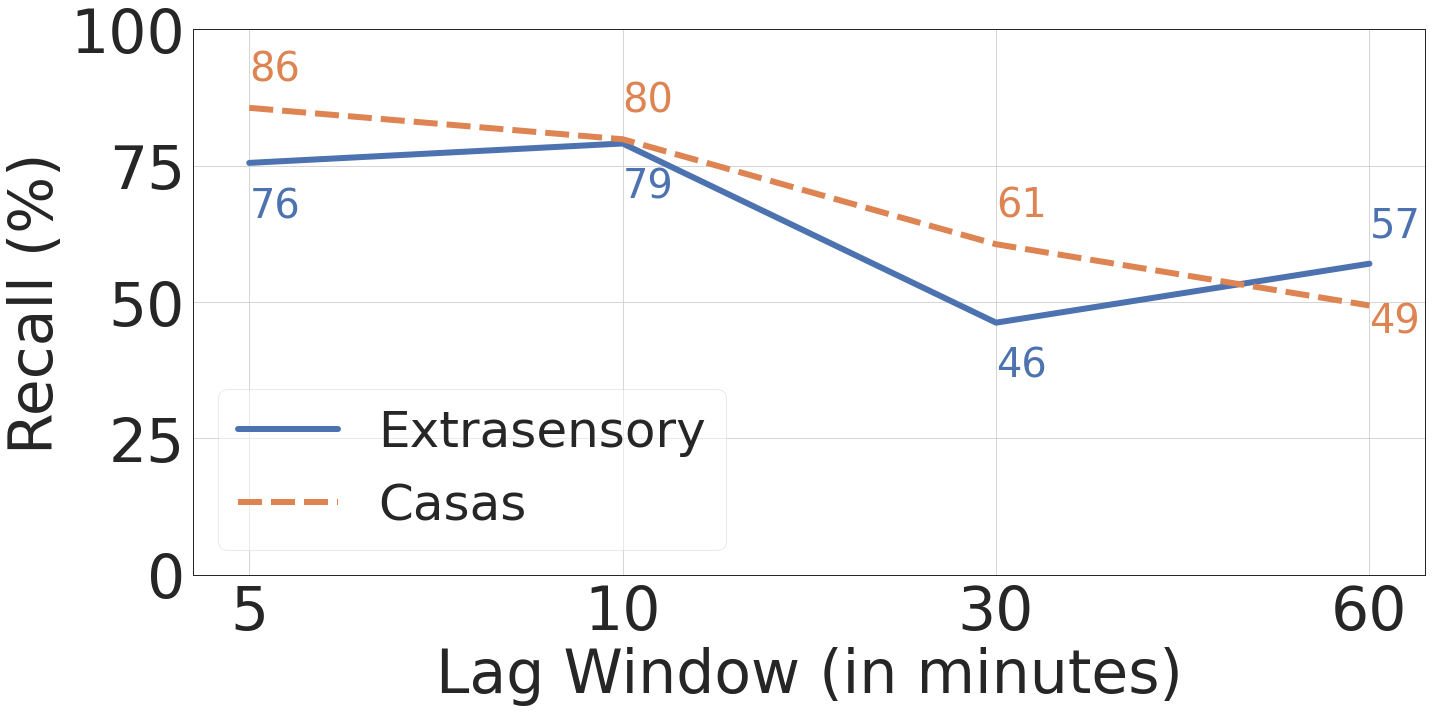

In [9]:
# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='Recall', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_recall_temporal_lag.png", dpi=150, bbox_inches='tight')

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_rq1a,x='lag',y='Recall', style='dataset',hue='dataset',linewidth=6)
plt.xticks((0,1,2,3),(5,10,30,60))
plt.ylabel('Recall (%)')
plt.xlabel('Lag Window (in minutes)')
plt.legend(loc='lower left', labels=['Extrasensory','Casas'], fontsize=50)
plt.ylim(0,100)

# label points on the plot
i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='extrasensory']['lag'], df_rq1a[df_rq1a.dataset=='extrasensory']['Recall']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-10, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    i+=1


i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='casas']['lag'], df_rq1a[df_rq1a.dataset=='casas']['Recall']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    i+=1

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/rq1a_recall_temporal_lag.pdf", dpi=400, bbox_inches='tight')

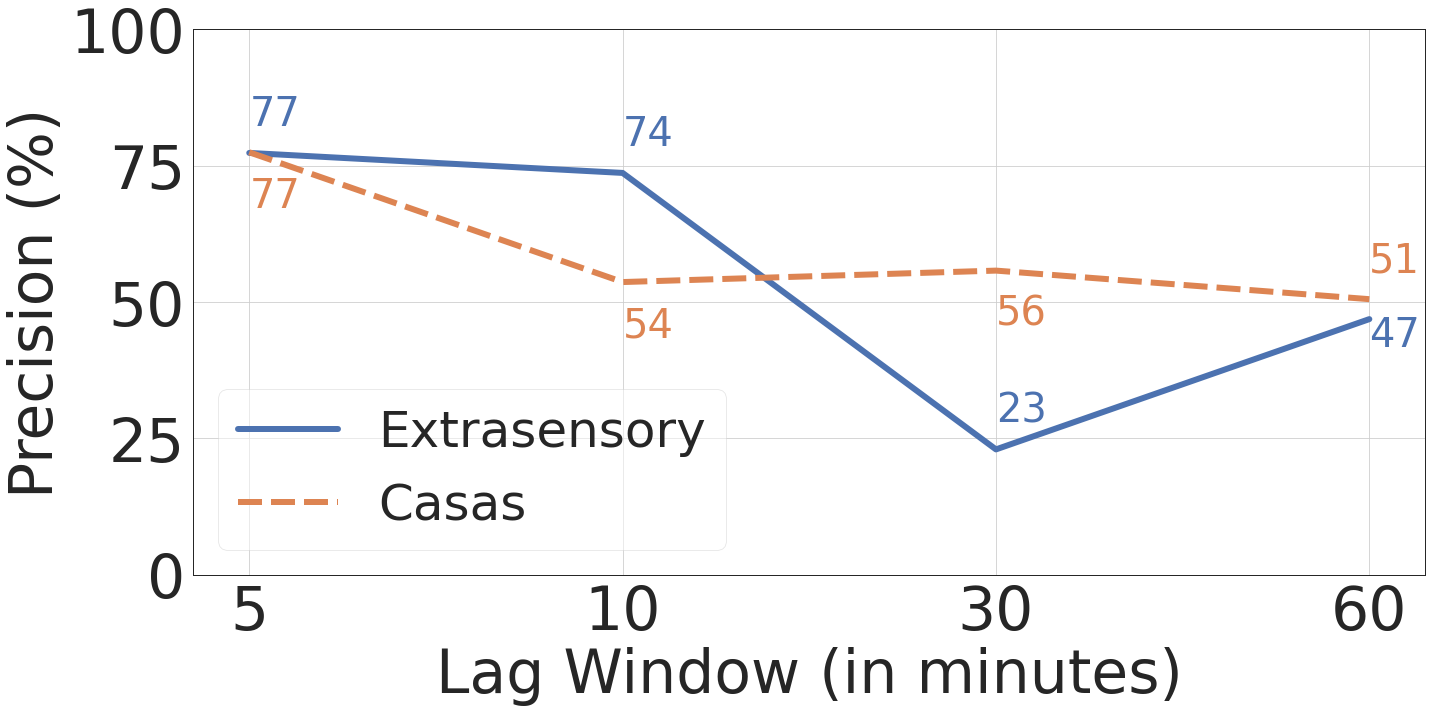

In [10]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='Precision', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_precision_temporal_lag.png", dpi=150, bbox_inches='tight')

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_rq1a,x='lag',y='Precision', style='dataset',hue='dataset',linewidth=6)
plt.xticks((0,1,2,3),(5,10,30,60))
plt.ylabel('Precision (%)')
plt.xlabel('Lag Window (in minutes)')
plt.legend(loc='lower left', labels=['Extrasensory','Casas'], fontsize=50)
plt.ylim(0,100)

# label points on the plot
i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='extrasensory']['lag'], df_rq1a[df_rq1a.dataset=='extrasensory']['Precision']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#4c72b0', size=40) # set colour of line
    i+=1


i=0
for x, y in zip(df_rq1a[df_rq1a.dataset=='casas']['lag'], df_rq1a[df_rq1a.dataset=='casas']['Precision']):
    if i==3:
        plt.text(x = x, # x-coordinate position of data label
                 y = y+5, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    else:
        plt.text(x = x, # x-coordinate position of data label
                 y = y-10, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = "{:.0f}".format(y), # data label, formatted to ignore decimals
                 color = '#dd8452', size=40) # set colour of line
    i+=1

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/rq1a_precision_temporal_lag.pdf", dpi=400, bbox_inches='tight')

In [11]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='F1-Score', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_f1_temporal_lag.png", dpi=150, bbox_inches='tight')

In [12]:
df_rq1a = None
for rq1a_exp in rq1a_experiments:
    exp_dir = f"{result_dir}/{rq1a_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_dataset = rq1a_exp.split("_")[0]
    exp_lag = str(rq1a_exp.split("_")[1])+' mins'
    df_exp_overall['dataset'] = exp_dataset
    df_exp_overall['lag'] = exp_lag
    if df_rq1a is None:
        df_rq1a = df_exp_overall.copy(deep=True)
    else:
        df_rq1a = pd.concat([df_rq1a,df_exp_overall],ignore_index=True)
df_rq1a.info()
df_rq1a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pipeline   24 non-null     object 
 1   F1-Score   24 non-null     float64
 2   Precision  24 non-null     float64
 3   Recall     24 non-null     float64
 4   Jaccard    24 non-null     float64
 5   dataset    24 non-null     object 
 6   lag        24 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.4+ KB


,pipeline,F1-Score,Precision,Recall,Jaccard,dataset,lag
0,onto,63.18,70.51,61.05,57.21,extrasensory,5 mins
1,temporal,72.33,77.34,75.51,76.85,extrasensory,5 mins
2,combined,70.91,69.39,80.37,69.00,extrasensory,5 mins
3,onto,63.19,70.52,61.06,57.22,extrasensory,10 mins
4,temporal,74.43,73.67,79.07,75.18,extrasensory,10 mins


In [13]:
df_rq1a.pipeline = df_rq1a.pipeline.apply(lambda x: 'Temporal' if (x=='temporal') else ('Ontology' if (x=='onto') else 'Combined'))
df_rq1a.pipeline.unique()

array(['Ontology', 'Temporal', 'Combined'], dtype=object)

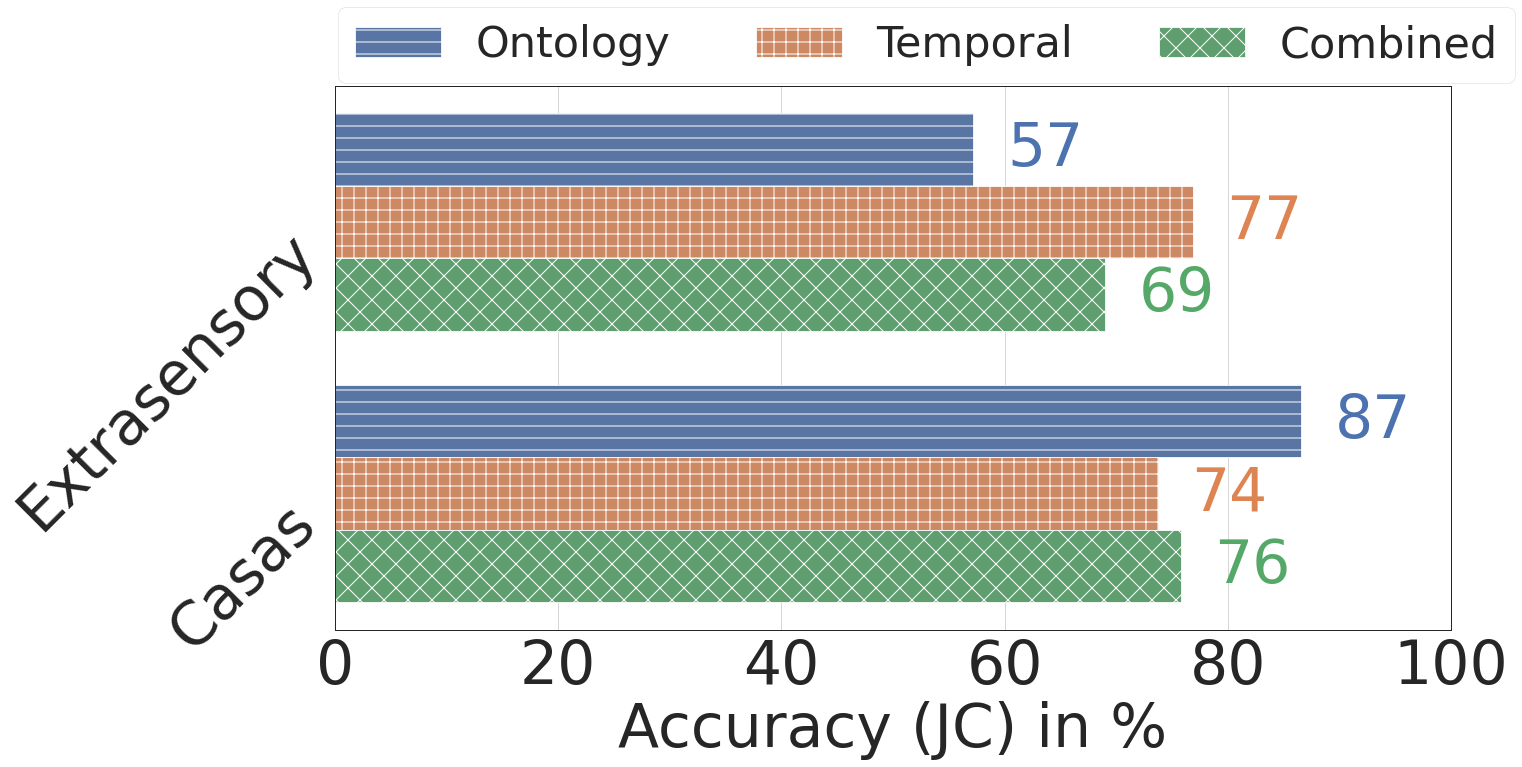

In [14]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Jaccard', hue='pipeline')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    p.set_hatch(hatches[i//2])

    # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # data label, formatted to ignore decimals
                     va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Accuracy (JC) in %')
plt.ylabel('')
plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1a_jaccard_bestmodel.pdf", dpi=400, bbox_inches='tight')

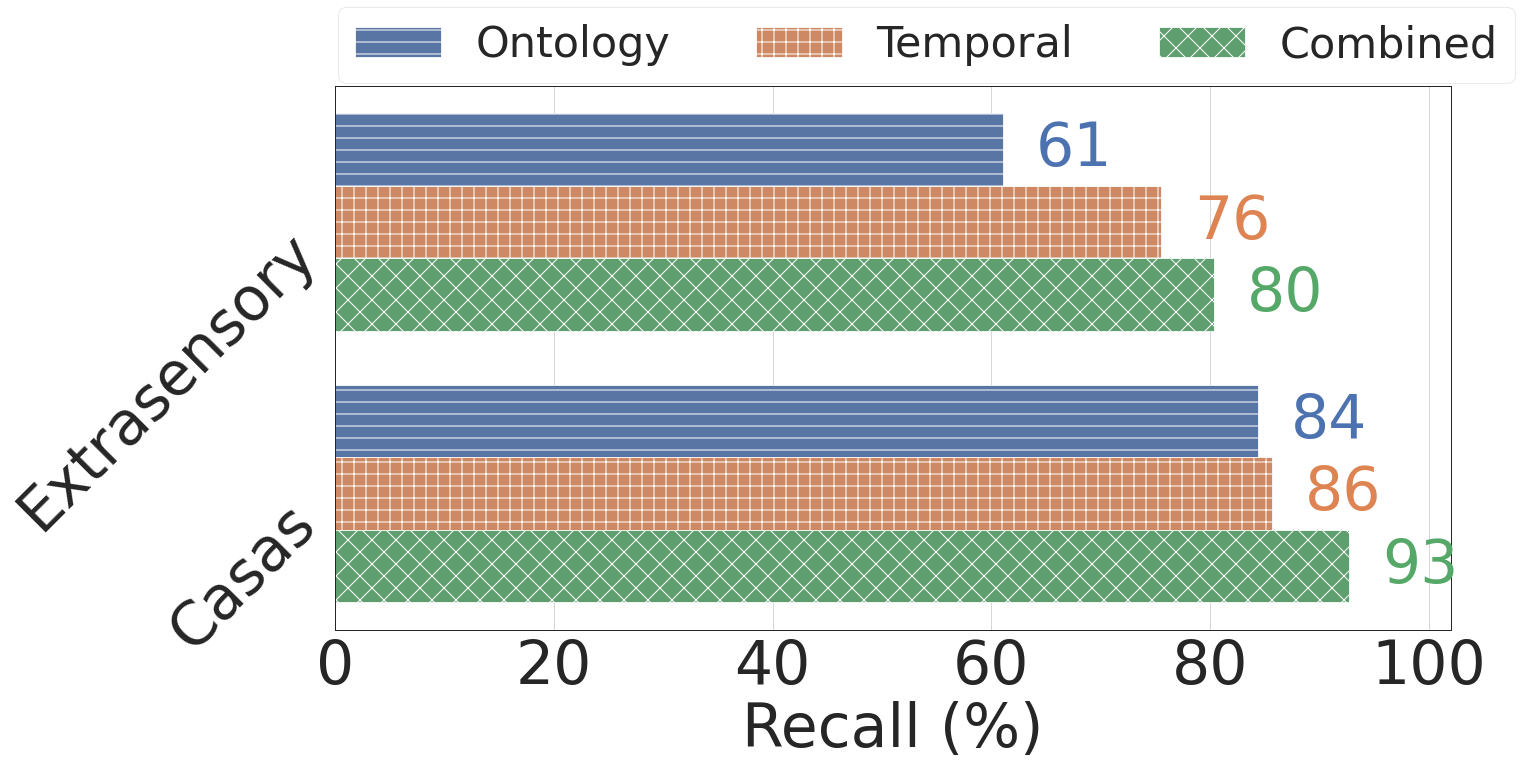

In [15]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Recall', hue='pipeline')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    p.set_hatch(hatches[i//2])

    # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # data label, formatted to ignore decimals
            va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Recall (%)')
plt.ylabel('')
plt.xlim(0,102)
plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1a_recall_bestmodel.pdf", dpi=400, bbox_inches='tight')

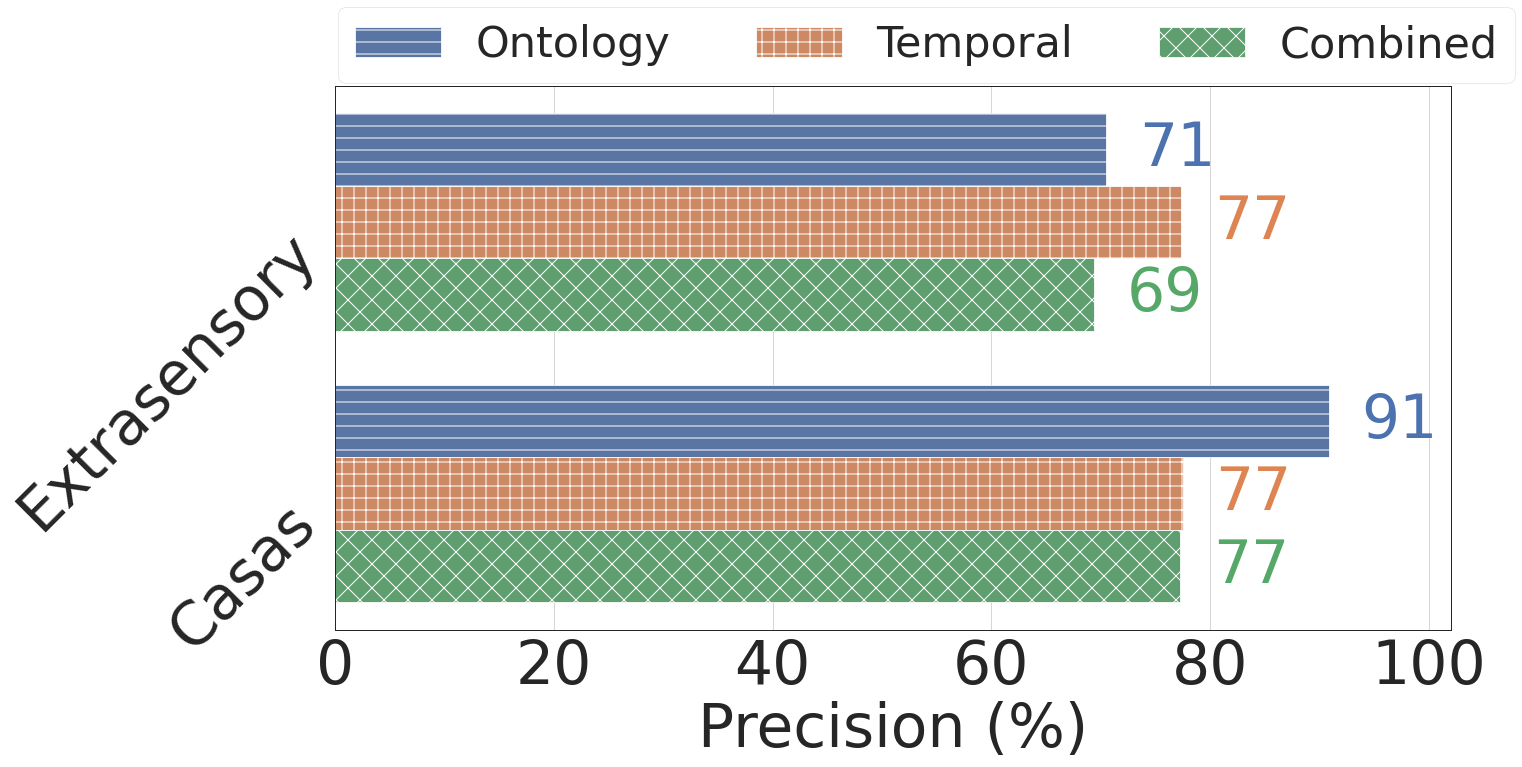

In [16]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Precision', hue='pipeline')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.xlim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i,p in enumerate(ax.patches):
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    p.set_hatch(hatches[i//2])

    # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
            y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
            s = "{:.0f}".format(width), # data label, formatted to ignore decimals
            va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Precision (%)')
plt.ylabel('')
plt.xlim(0,102)
plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1a_precision_bestmodel.pdf", dpi=400, bbox_inches='tight')

In [17]:

# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Recall', hue='pipeline',orient='h')
# plt.xticks(rotation=45,ha="right")
# plt.xlim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_recall_bestmodel.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='Precision', hue='pipeline',orient='h')
# plt.xticks(rotation=45,ha="right")
# plt.xlim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_precision_bestmodel.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1a[df_rq1a.lag=='5 mins'],y='dataset',x='F1-Score', hue='pipeline',orient='h')
# plt.xticks(rotation=45,ha="right")
# plt.xlim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_f1_bestmodel.png", dpi=150, bbox_inches='tight')

# Add results for incremental runs

In [18]:
rq1b_experiments = ['casas_csh101_1days_5_1_TAE',
                    'casas_csh101_7days_5_1_TAE',
                    'casas_csh101_14days_5_1_TAE',
                    'casas_csh101_30days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_1days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_2days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_4days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_6days_5_1_TAE']

df_rq1b = None
for rq1b_exp in rq1b_experiments:
    exp_dir = f"{result_dir}/{rq1b_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_dataset = rq1b_exp.split("_")[0]
    exp_training_days = str(rq1b_exp.split("_")[2])[:-4]
    df_exp_overall['dataset'] = exp_dataset
    df_exp_overall['training_time'] = exp_training_days
    if df_rq1b is None:
        df_rq1b = df_exp_overall.copy(deep=True)
    else:
        df_rq1b = pd.concat([df_rq1b,df_exp_overall],ignore_index=True)
# df_rq1b['dataset_time'] = df_rq1b['dataset']+'-'+df_rq1b['training_time']
df_rq1b = df_rq1b[df_rq1b.pipeline=='temporal'].drop(['pipeline','F1-Score'],axis=1)
# df_rq1b = df_rq1b.sort_values(by=['dataset_time'])
df_rq1b.info()
df_rq1b.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precision      8 non-null      float64
 1   Recall         8 non-null      float64
 2   Jaccard        8 non-null      float64
 3   dataset        8 non-null      object 
 4   training_time  8 non-null      object 
dtypes: float64(3), object(2)
memory usage: 384.0+ bytes


,Precision,Recall,Jaccard,dataset,training_time
1,28.78,54.07,30.23,casas,1
4,49.73,69.60,36.11,casas,7
7,47.86,79.73,34.14,casas,14
10,69.72,98.28,72.17,casas,30
13,38.34,45.70,40.87,extrasensory,1


In [19]:
df_rq1b_melt = pd.melt(df_rq1b,id_vars=['dataset','training_time'],var_name='Metric',value_name='value')
df_rq1b_melt['Metric'] = df_rq1b_melt['Metric'].apply(lambda x: 'Accuracy (JC)' if x=='Jaccard' else x)
df_rq1b_melt = pd.concat([df_rq1b_melt[df_rq1b_melt.Metric=='Accuracy (JC)'], df_rq1b_melt[~(df_rq1b_melt.Metric=='Accuracy (JC)')]],ignore_index=False)

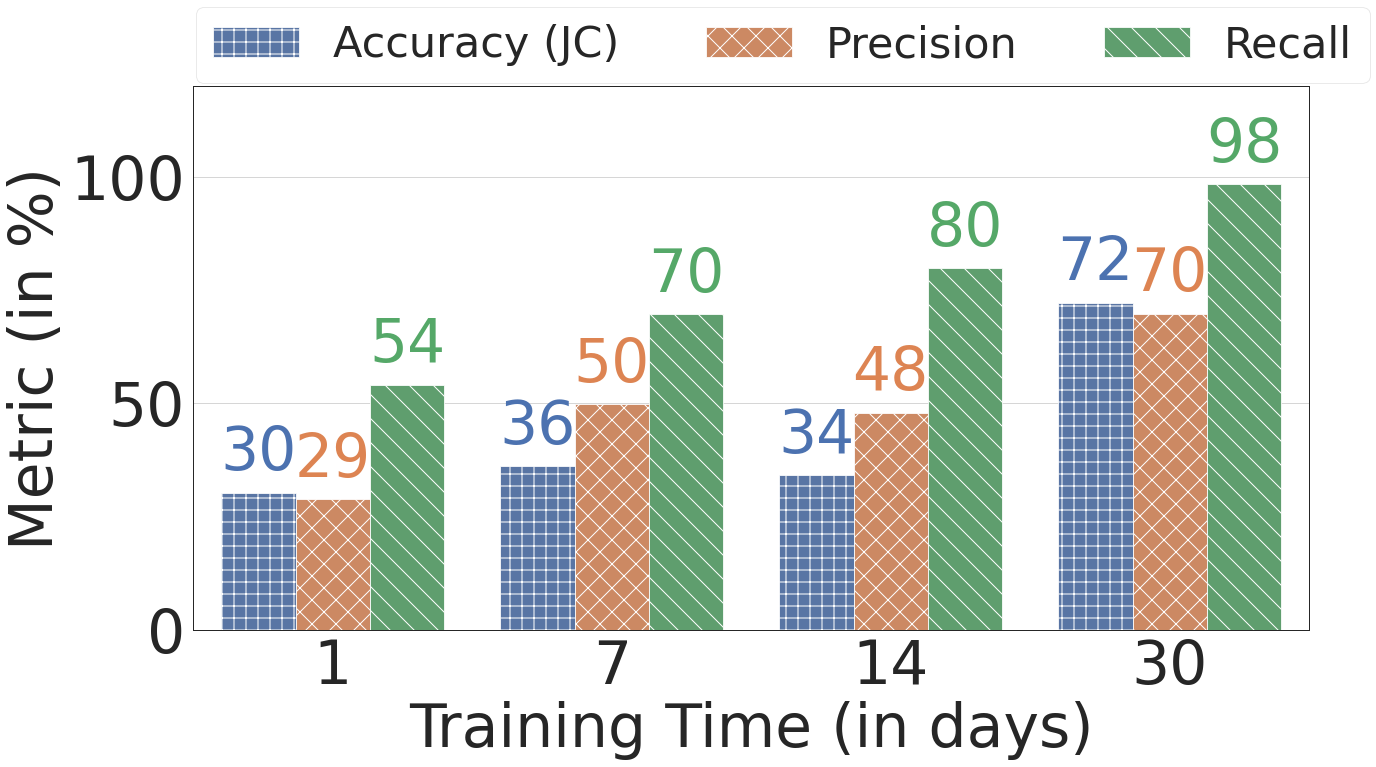

In [20]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='casas'],x='training_time',y='value',hue='Metric')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_precision.png", dpi=150, bbox_inches='tight')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='casas'],x='training_time',y='value',hue='Metric')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//4])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+5, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
                         ha = 'center', size=60, color=colors[i//4]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Training Time (in days)')
plt.ylabel('Metric (in %)')
plt.ylim(0,120)
# plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1b_casas.pdf", dpi=400, bbox_inches='tight')

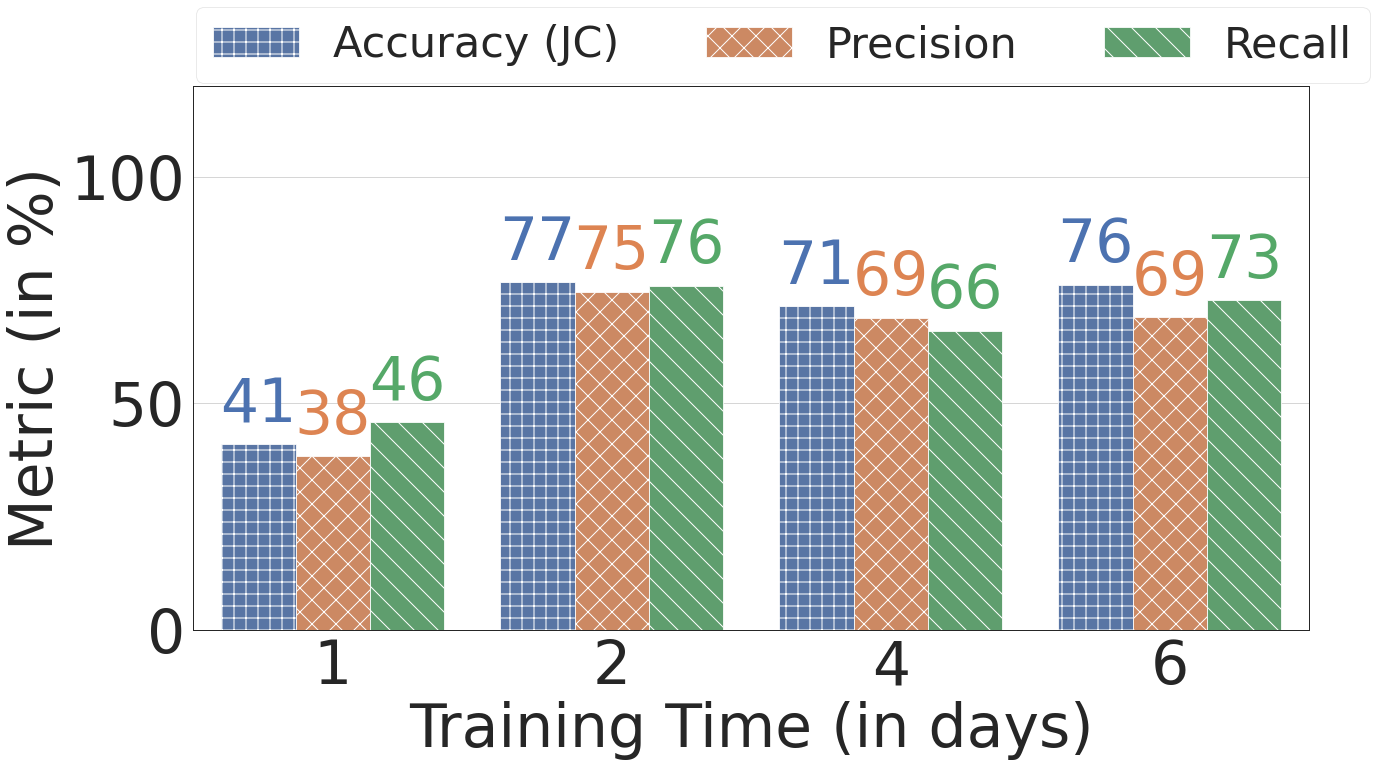

In [21]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='casas'],x='training_time',y='value',hue='Metric')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_precision.png", dpi=150, bbox_inches='tight')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq1b_melt[df_rq1b_melt.dataset=='extrasensory'],x='training_time',y='value',hue='Metric')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//4])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+5, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=60, color=colors[i//4]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.017, 1.185),fontsize=43)
plt.xlabel('Training Time (in days)')
plt.ylabel('Metric (in %)')
plt.ylim(0,120)
# plt.yticks((0,1),('Extrasensory','Casas'),rotation=45,va='top')
# plt.legend(labels=['Ontology','Temporal','Combined'], fontsize=50)
plt.savefig(f"{plotting_dir}/rq1b_extrasensory.pdf", dpi=400, bbox_inches='tight')

In [22]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='Precision',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_precision.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='Recall',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_recall.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='F1-Score',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_f1.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq1b[df_rq1b.pipeline=='temporal'],x='dataset_time',y='Jaccard',hue='pipeline')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1b_jaccard.png", dpi=150, bbox_inches='tight')

# Add context results for datasets

In [23]:
rq1c_experiments = ['extrasensory_5_1_TAE','casas_5_1_TAE']
df_rq1c = None
for rq1c_exp in rq1c_experiments:
    exp_dir = f"{result_dir}/{rq1c_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/context_metrics.csv")
    df_exp_overall.columns = ['index','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']
    exp_dataset = rq1c_exp.split("_")[0]
    exp_lag = str(rq1c_exp.split("_")[1])+' mins'
    df_exp_overall['dataset'] = exp_dataset
    df_exp_overall['lag'] = exp_lag
    if df_rq1c is None:
        df_rq1c = df_exp_overall.copy(deep=True)
    else:
        df_rq1c = pd.concat([df_rq1c,df_exp_overall],ignore_index=True)
df_rq1c.info()
df_rq1c.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               24 non-null     int64  
 1   Context             24 non-null     object 
 2   Onto-Precision      24 non-null     float64
 3   Onto-Recall         24 non-null     float64
 4   Temporal-Precision  24 non-null     float64
 5   Temporal-Recall     24 non-null     float64
 6   Combined-Precision  24 non-null     float64
 7   Combined-Recall     24 non-null     float64
 8   dataset             24 non-null     object 
 9   lag                 24 non-null     object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ KB


,index,Context,Onto-Precision,Onto-Recall,Temporal-Precision,Temporal-Recall,Combined-Precision,Combined-Recall,dataset,lag
0,0,Amusement,31.43,33.56,56.42,93.81,40.91,94.01,extrasensory,5 mins
1,1,ComingIn,0.00,0.00,0.00,0.00,0.00,0.00,extrasensory,5 mins
2,2,Commuting,9.73,16.79,39.97,53.40,21.47,61.38,extrasensory,5 mins
3,3,Exercising,94.12,9.67,94.44,71.90,94.41,81.57,extrasensory,5 mins
4,4,GoingOut,0.00,0.00,0.00,0.00,0.00,0.00,extrasensory,5 mins


In [24]:
# df_rq1c = df_rq1c.set_index('index')
df_rq1c[['dataset','Context','Combined-Precision','Combined-Recall']].round(2).to_csv(f"{plotting_dir}/rq1_context_table.csv",index=False)

# Overall Metrics for Real World Study

In [25]:
rq3a_experiments = ['p1_dataset_0.05_0.01_TAE',
                   'p2_dataset_0.05_0.01_TAE',
                   'p3_dataset_0.05_0.01_TAE',
                   'p4_dataset_0.05_0.01_TAE',
                   'p5_dataset_0.05_0.01_TAE',
                   'p6_dataset_0.05_0.01_TAE',
                   'p7_dataset_0.05_0.01_TAE',
                   'p10_dataset_0.05_0.01_TAE']

In [26]:
df_rq3a = None
for rq3a_exp in rq3a_experiments:
    exp_dir = f"{result_dir}/{rq3a_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_user = rq3a_exp.split("_")[0]
    df_exp_overall['user'] = exp_user
    if df_rq3a is None:
        df_rq3a = df_exp_overall.copy(deep=True)
    else:
        df_rq3a = pd.concat([df_rq3a,df_exp_overall],ignore_index=True)
df_rq3a = df_rq3a[df_rq3a.pipeline=='combined']
df_rq3a.info()
df_rq3a.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pipeline   8 non-null      object 
 1   F1-Score   8 non-null      float64
 2   Precision  8 non-null      float64
 3   Recall     8 non-null      float64
 4   Jaccard    8 non-null      float64
 5   user       8 non-null      object 
dtypes: float64(4), object(2)
memory usage: 448.0+ bytes


,pipeline,F1-Score,Precision,Recall,Jaccard,user
2,combined,73.31,68.54,82.28,65.91,p1
5,combined,69.72,65.57,79.64,61.08,p2
8,combined,70.74,68.66,77.94,63.64,p3
11,combined,71.51,68.57,78.21,66.61,p4
14,combined,73.11,71.30,77.26,69.11,p5


In [27]:
rq3b_experiments = ['mites_p1_dataset_0.05_0.01_TAE',
                    'mites_p2_dataset_0.05_0.01_TAE',
                    'mites_p3_dataset_0.05_0.01_TAE',
                    'mites_p4_dataset_0.05_0.01_TAE',
                    'mites_p5_dataset_0.05_0.01_TAE',
                    'mites_p6_dataset_0.05_0.01_TAE',
                    'mites_p7_dataset_0.05_0.01_TAE',
                    'mites_p10_dataset_0.05_0.01_TAE']

In [28]:
df_rq3b = None
for rq3b_exp in rq3b_experiments:
    exp_dir = f"{result_dir}/{rq3b_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/overall_metrics.csv")
    df_exp_overall.columns = ['pipeline','F1-Score','Precision','Recall','Jaccard']
    exp_user = rq3b_exp.split("_")[1]
    df_exp_overall['user'] = exp_user
    if df_rq3b is None:
        df_rq3b = df_exp_overall.copy(deep=True)
    else:
        df_rq3b = pd.concat([df_rq3b,df_exp_overall],ignore_index=True)
df_rq3b = df_rq3b[df_rq3b.pipeline=='combined']
df_rq3b.info()
df_rq3b.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pipeline   8 non-null      object 
 1   F1-Score   8 non-null      float64
 2   Precision  8 non-null      float64
 3   Recall     8 non-null      float64
 4   Jaccard    8 non-null      float64
 5   user       8 non-null      object 
dtypes: float64(4), object(2)
memory usage: 448.0+ bytes


,pipeline,F1-Score,Precision,Recall,Jaccard,user
2,combined,32.54,33.65,34.22,21.99,p1
5,combined,28.74,25.94,33.96,16.78,p2
8,combined,31.99,37.74,33.44,25.10,p3
11,combined,32.38,35.45,33.50,19.42,p4
14,combined,32.58,46.42,34.39,19.74,p5


In [29]:
df_rq3a['label_source'] = 'Video-annotated activities'
df_rq3b['label_source'] = 'Mites activity predictions'
df_rq3b['Jaccard'] = df_rq3b['Jaccard']

df_rq3 = pd.concat([df_rq3a, df_rq3b],ignore_index=True)
df_rq3['user'] = df_rq3['user'].apply(lambda x: 'p8' if (x=='p10') else x)
df_rq3.info()
df_rq3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pipeline      16 non-null     object 
 1   F1-Score      16 non-null     float64
 2   Precision     16 non-null     float64
 3   Recall        16 non-null     float64
 4   Jaccard       16 non-null     float64
 5   user          16 non-null     object 
 6   label_source  16 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.0+ KB


,pipeline,F1-Score,Precision,Recall,Jaccard,user,label_source
0,combined,73.31,68.54,82.28,65.91,p1,Video-annotated activities
1,combined,69.72,65.57,79.64,61.08,p2,Video-annotated activities
2,combined,70.74,68.66,77.94,63.64,p3,Video-annotated activities
3,combined,71.51,68.57,78.21,66.61,p4,Video-annotated activities
4,combined,73.11,71.30,77.26,69.11,p5,Video-annotated activities


In [30]:
df_rq3.groupby('label_source')['Precision','Recall','Jaccard'].mean()

/tmp/ipykernel_5877/777584597.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rq3.groupby('label_source')['Precision','Recall','Jaccard'].mean()


,Precision,Recall,Jaccard
label_source,,,
Mites activity predictions,33.75625,35.17375,21.97375
Video-annotated activities,67.73750,79.35875,65.23875


In [31]:
df_rq3['Jaccard']

0     65.91
1     61.08
2     63.64
3     66.61
4     69.11
5     58.64
6     70.21
7     66.71
8     21.99
9     16.78
10    25.10
11    19.42
12    19.74
13    33.28
14    22.63
15    16.85
Name: Jaccard, dtype: float64

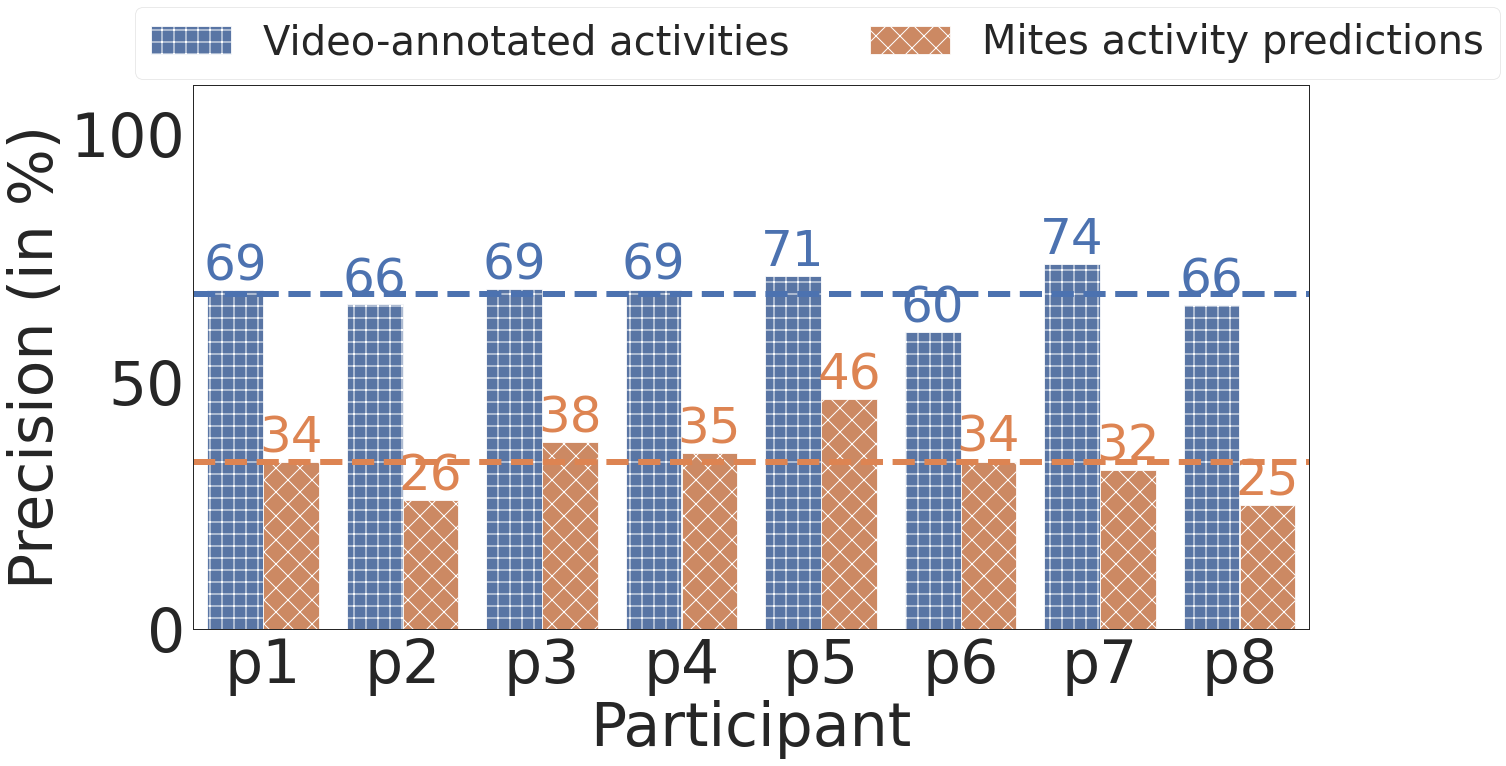

In [32]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
#


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq3,x='user',y='Precision',hue='label_source')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=50, color=colors[i//8]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.07, 1.18),fontsize=40)
plt.axhline(y=df_rq3[df_rq3.label_source=='Video-annotated activities'].Precision.mean(),color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=df_rq3[df_rq3.label_source=='Mites activity predictions'].Precision.mean(),color='#dd8452',linestyle='--',linewidth=6)
plt.xlabel('Participant')
plt.grid(False)
plt.ylabel('Precision (in %)')
plt.ylim(0,110)

plt.savefig(f"{plotting_dir}/rq3_precision.pdf", dpi=400, bbox_inches='tight')


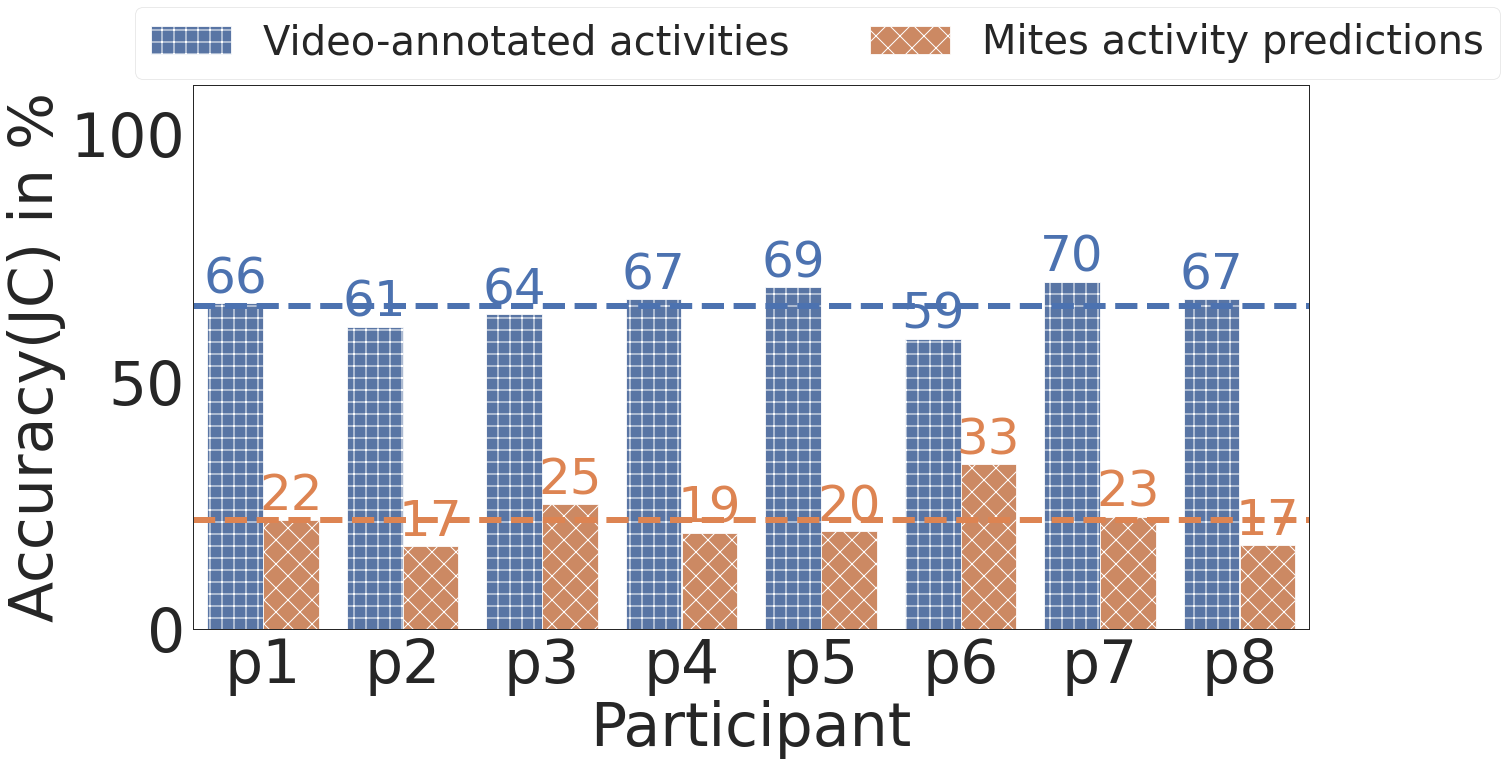

In [33]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
#


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq3,x='user',y='Jaccard',hue='label_source')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=50, color=colors[i//8]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.07, 1.18),fontsize=40)
plt.axhline(y=df_rq3[df_rq3.label_source=='Video-annotated activities'].Jaccard.mean(),color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=df_rq3[df_rq3.label_source=='Mites activity predictions'].Jaccard.mean(),color='#dd8452',linestyle='--',linewidth=6)
plt.xlabel('Participant')
plt.ylabel('Accuracy(JC) in %')
plt.grid(False)
plt.ylim(0,110)

plt.savefig(f"{plotting_dir}/rq3_jaccard.pdf", dpi=400, bbox_inches='tight')


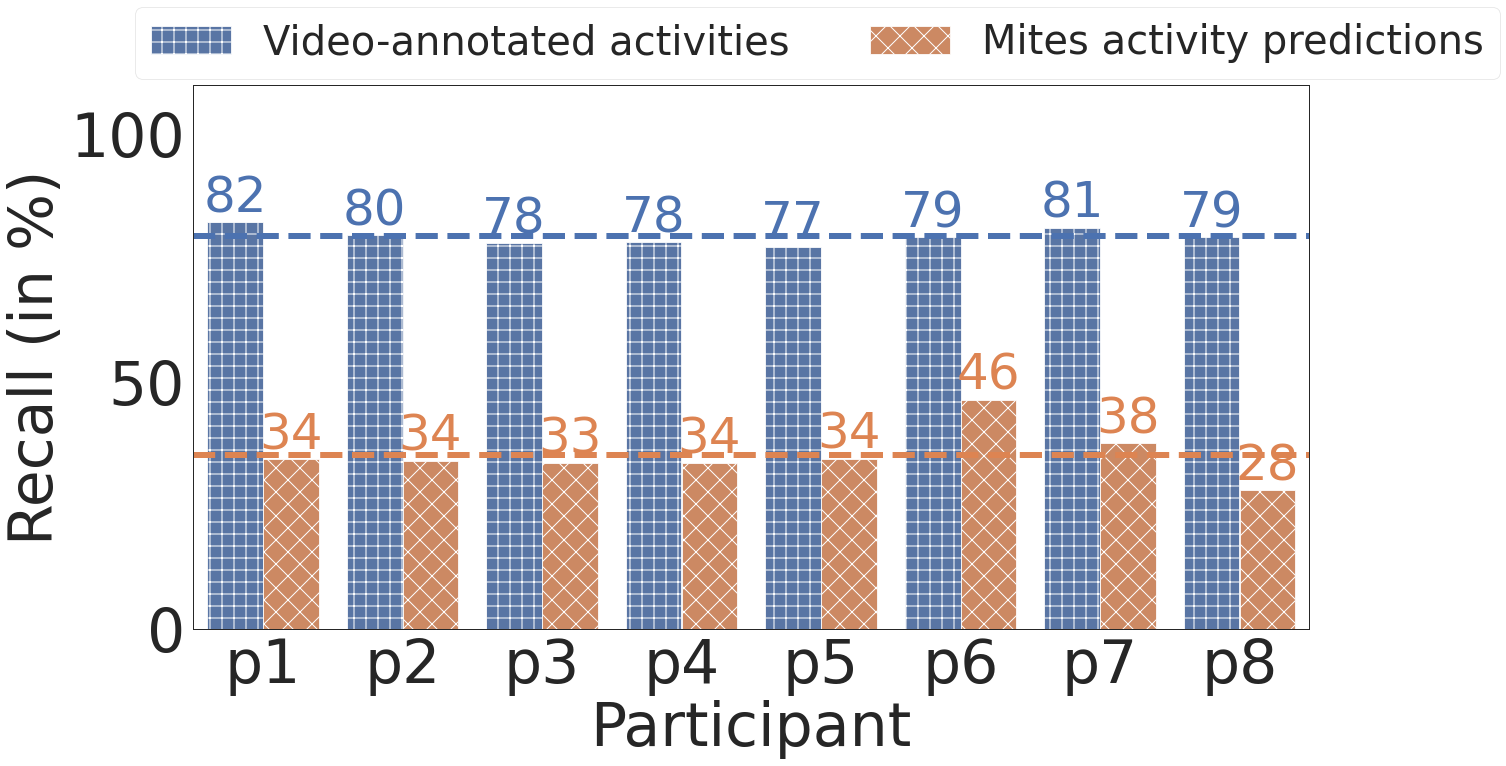

In [34]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
#


plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_rq3,x='user',y='Recall',hue='label_source')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=50, color=colors[i//8]) # sets horizontal alignment (ha) to center
plt.legend(ncol=3, bbox_to_anchor=(-0.07, 1.18),fontsize=40)
plt.axhline(y=df_rq3[df_rq3.label_source=='Video-annotated activities'].Recall.mean(),color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=df_rq3[df_rq3.label_source=='Mites activity predictions'].Recall.mean(),color='#dd8452',linestyle='--',linewidth=6)
plt.xlabel('Participant')
plt.ylabel('Recall (in %)')
plt.grid(False)
plt.ylim(0,110)

plt.savefig(f"{plotting_dir}/rq3_recall.pdf", dpi=400, bbox_inches='tight')


In [35]:
df_stress = pd.read_csv("../../cache/stress_scores.csv")
df_stress.info()
df_stress.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   week_id  75 non-null     object 
 1   id       75 non-null     object 
 2   week     75 non-null     object 
 3   score    75 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


,week_id,id,week,score
0,week 1,csh101,2012_29,2.0
1,week 2,csh101,2012_30,2.0
2,week 3,csh101,2012_31,2.0
3,week 4,csh101,2012_32,1.0
4,week 5,csh101,2012_33,2.0


In [36]:
df_stress.week_id.value_counts().sort_index()

week 1    15
week 2    15
week 3    15
week 4    15
week 5    14
week 8     1
Name: week_id, dtype: int64

In [37]:
df_stress = df_stress[df_stress.id.isin(['csh109','csh113','csh114','csh107','csh104','csh103'])]
df_stress['score'] = df_stress['score'].apply(lambda x: (x-df_stress['score'].min())*100/(df_stress['score'].max()-df_stress['score'].min()))

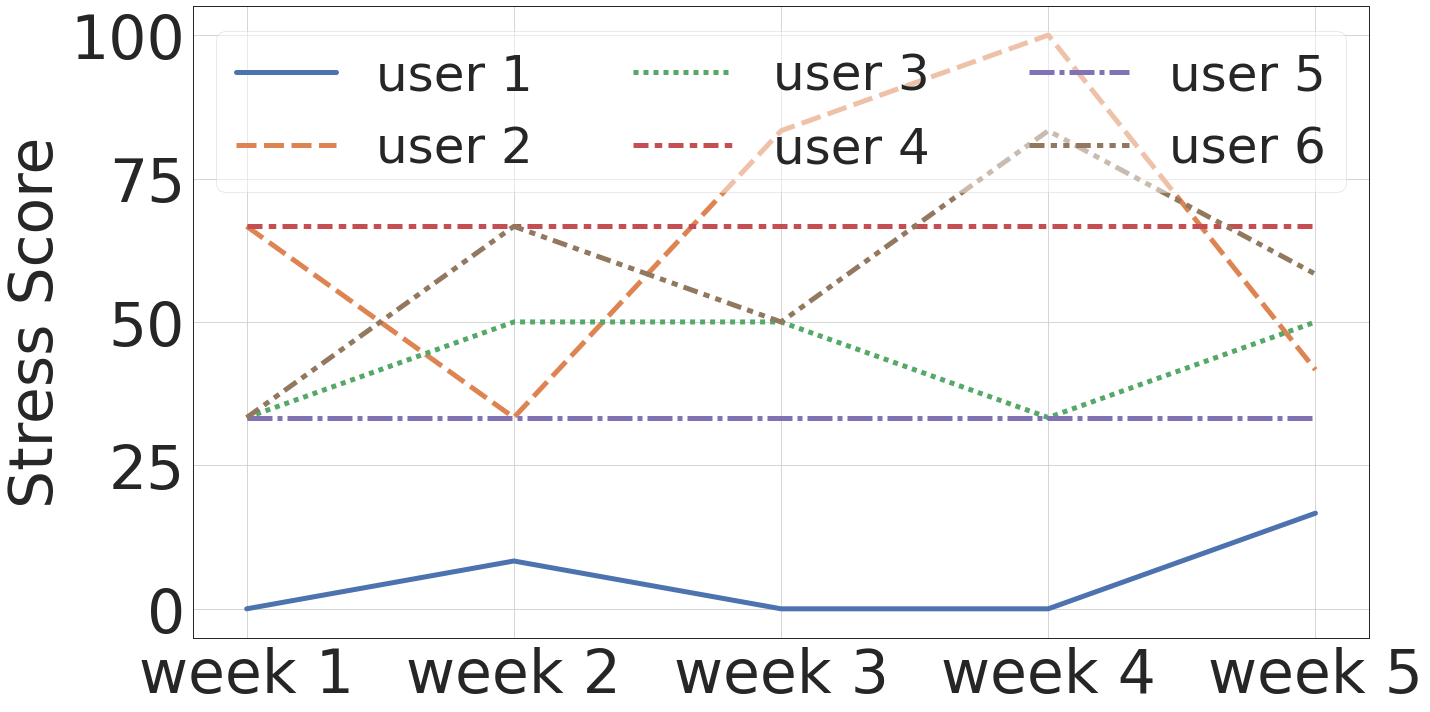

In [38]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_stress,x='week_id',y='score', hue='id',style='id')
# plt.yticks([-1,0,1,2,3,4,5,6],[-1,0,1,2,3,4,5,6])
plt.xlabel("")
plt.ylabel("Stress Score")
# plt.ylabel('Precision (%)')
# plt.xlabel('Lag Window (in minutes)')
plt.legend(ncol=3, loc='upper center', labels=['user 1','user 2','user 3','user 4','user 5','user 6'], fontsize=50)
# plt.ylim(0,10)

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/stress_plot.pdf",dpi=400,bbox_inches='tight')

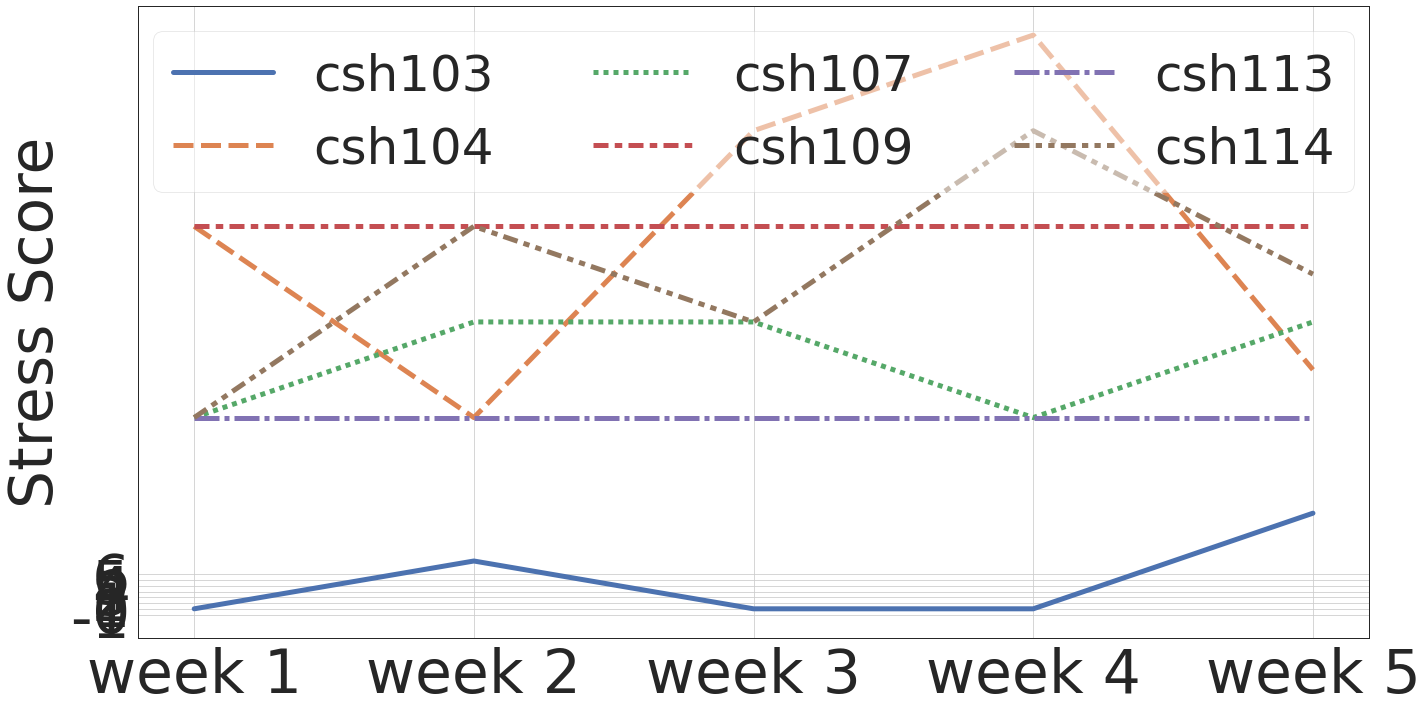

In [39]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_stress,x='week_id',y='score', hue='id',style='id')
plt.yticks([-1,0,1,2,3,4,5,6],[-1,0,1,2,3,4,5,6])
plt.xlabel("")
plt.ylabel("Stress Score")
# plt.ylabel('Precision (%)')
# plt.xlabel('Lag Window (in minutes)')
plt.legend(ncol=3, loc='upper center', fontsize=50)
# plt.ylim(0,10)

# plt.grid(False)
plt.tight_layout()

In [241]:
prod_data = [{'2015-11-17': 0.0,
              '2015-11-18': 0.5156862745098039,
              '2015-11-19': 0.6343984962406015,
              '2015-11-20': 0.2857142857142857,
              '2015-11-21': 0.5,
              '2015-11-22': 0.13917525773195874}]
df_prod = None
for idx, user_prod in enumerate(prod_data):
    df_user = pd.DataFrame.from_dict(user_prod, orient='index')
    print(df_user)
    df_user = df_user.reset_index().reset_index()
    df_user.columns= ['day_id','day','score']
    df_user['id'] = f'user {idx+1}'
    df_user['day_id']  = df_user['day_id'].apply(lambda x: 'day '+ str(x+1))
    df_user = df_user[['id','day_id','score']]
    if df_prod is None:
        df_prod=df_user.copy(deep=True)
    else:
        df_prod=pd.concat([df_prod, df_user],ignore_index=False)

df_prod.info()

                   0
2015-11-17  0.000000
2015-11-18  0.515686
2015-11-19  0.634398
2015-11-20  0.285714
2015-11-21  0.500000
2015-11-22  0.139175
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      6 non-null      object 
 1   day_id  6 non-null      object 
 2   score   6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [242]:
prod_data = [{'2015-11-17': 0.0,
              '2015-11-18': 0.5156862745098039,
              '2015-11-19': 0.6343984962406015,
              '2015-11-20': 0.2857142857142857,
              '2015-11-21': 0.5,
              '2015-11-22': 0.13917525773195874}]
df_prod = None
for idx, user_prod in enumerate(prod_data):
    df_user = pd.DataFrame.from_dict(user_prod, orient='index')
    print(df_user)
    df_user = df_user.reset_index().reset_index()
    df_user.columns= ['day_id','day','score']
    df_user['id'] = f'user {idx+1}'
    df_user['day_id']  = df_user['day_id'].apply(lambda x: 'day '+ str(x+1))
    df_user = df_user[['id','day_id','score']]
    if df_prod is None:
        df_prod=df_user.copy(deep=True)
    else:
        df_prod=pd.concat([df_prod, df_user],ignore_index=False)

df_prod.info()

                   0
2015-11-17  0.000000
2015-11-18  0.515686
2015-11-19  0.634398
2015-11-20  0.285714
2015-11-21  0.500000
2015-11-22  0.139175
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      6 non-null      object 
 1   day_id  6 non-null      object 
 2   score   6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [243]:
df_prod.head()

,id,day_id,score
0,user 1,day 1,0.000000
1,user 1,day 2,0.515686
2,user 1,day 3,0.634398
3,user 1,day 4,0.285714
4,user 1,day 5,0.500000


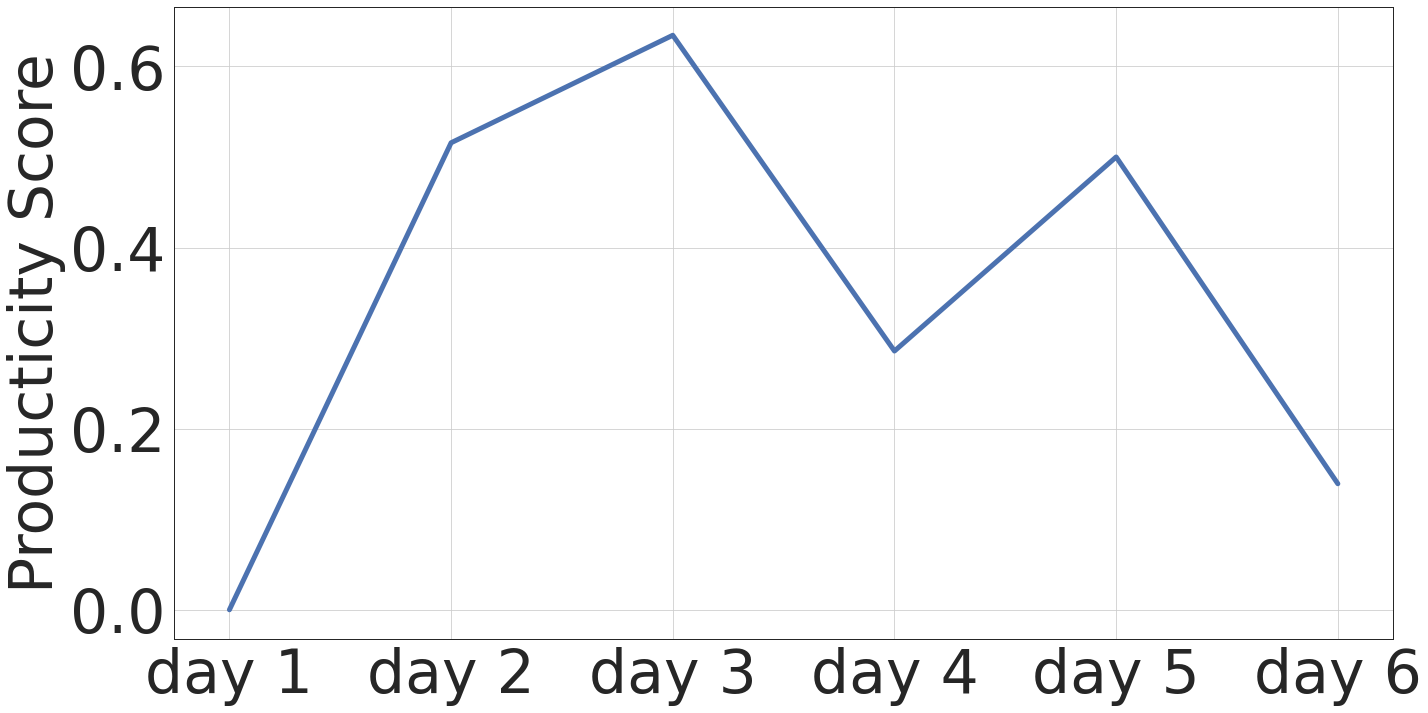

In [244]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data=df_rq1a[df_rq1a.pipeline=='temporal'],x='lag',y='Precision', hue='dataset')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq1a_precision_temporal_lag.png", dpi=150, bbox_inches='tight')

fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_prod,x='day_id',y='score', hue='id')
# plt.xticks(rotation=90)
plt.ylabel('Producticity Score')
plt.xlabel('')
ax.get_legend().remove()
# plt.ylim(0,100)

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/prod_score.pdf", dpi=400, bbox_inches='tight')

In [245]:
# new Productivity Graph
# df_productivity = pd.read_csv("../../cache/feb2023/productivity_results_all_users_v1.csv")
df_productivity = pd.read_csv("../../cache/feb2023/productivity_results_all_users_subset.csv")
df_productivity.info()
df_productivity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      44 non-null     object 
 1   day_id  44 non-null     object 
 2   score   44 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


,id,day_id,score
0,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 1,0.127715
1,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 2,0.119468
2,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 3,0.000000
3,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 4,0.098125
4,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 5,0.272239


In [47]:
df_productivity = pd.DataFrame.from_dict({'1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842': {'day 1': 0.12447916666666667,
  'day 2': 0.05364583333333333,
  'day 3': 0.0,
  'day 4': 0.09791666666666665,
  'day 5': 0.26619115699979073,
  'day 6': 0.11927083333333333},
 '7CE37510-56D0-4120-A1CF-0E23351428D2': {'day 1': 0.03333333333333334,
  'day 2': 0.0010416666666666656,
  'day 3': 0.0,
  'day 4': 0.0,
  'day 5': 0.06302083333333333,
  'day 6': 0.05104166666666667},
 '0BFC35E2-4817-4865-BFA7-764742302A2D': {'day 1': 0.12854902339667712,
  'day 2': 0.16225885515496521,
  'day 3': 0.033316256830601104,
  'day 4': 0.08186354434319196,
  'day 5': 0.05340676229508196,
  'day 6': 0.23937469148088528},
 '1538C99F-BA1E-4EFB-A949-6C7C47701B20': {'day 1': 0.03177083333333333,
  'day 2': 0.17239583333333336,
  'day 3': 0.03333333333333334,
  'day 4': 0.09166666666666667,
  'day 5': 0.25520833333333337,
  'day 6': 0.26979166666666665},
 '7D9BB102-A612-4E2A-8E22-3159752F55D8': {'day 1': 0.12864583333333332,
  'day 2': 0.09791666666666665,
  'day 3': 0.06302083333333333,
  'day 4': 0.041666666666666664,
  'day 5': 0.12395833333333334,
  'day 6': 0.0125},
 '1155FF54-63D3-4AB2-9863-8385D0BD0A13': {'day 1': 0.03229166666666666,
  'day 2': 0.06939036885245903,
  'day 3': 0.03631628787878788,
  'day 4': 0.007291666666666663,
  'day 5': 0.007291666666666666,
  'day 6': 0.04479166666666666,}},orient='index')
df_productivity = pd.melt(df_productivity.reset_index(), id_vars='index',var_name='day_id',value_name='score')
df_productivity = df_productivity[~df_productivity.score.isnull()]
df_productivity.columns= ['id','day_id','score']
df_productivity

,id,day_id,score
0,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 1,0.124479
1,7CE37510-56D0-4120-A1CF-0E23351428D2,day 1,0.033333
2,0BFC35E2-4817-4865-BFA7-764742302A2D,day 1,0.128549
3,1538C99F-BA1E-4EFB-A949-6C7C47701B20,day 1,0.031771
4,7D9BB102-A612-4E2A-8E22-3159752F55D8,day 1,0.128646
5,1155FF54-63D3-4AB2-9863-8385D0BD0A13,day 1,0.032292
6,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 2,0.053646
7,7CE37510-56D0-4120-A1CF-0E23351428D2,day 2,0.001042
8,0BFC35E2-4817-4865-BFA7-764742302A2D,day 2,0.162259
9,1538C99F-BA1E-4EFB-A949-6C7C47701B20,day 2,0.172396


In [48]:
# df_productivity.head
df_productivity.day_id.value_counts().sort_index()

day 1    6
day 2    6
day 3    6
day 4    6
day 5    6
day 6    6
Name: day_id, dtype: int64

In [49]:
df_productivity.groupby(["id"])["day_id"].count()

id
0BFC35E2-4817-4865-BFA7-764742302A2D    6
1155FF54-63D3-4AB2-9863-8385D0BD0A13    6
1538C99F-BA1E-4EFB-A949-6C7C47701B20    6
1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842    6
7CE37510-56D0-4120-A1CF-0E23351428D2    6
7D9BB102-A612-4E2A-8E22-3159752F55D8    6
Name: day_id, dtype: int64

In [50]:
df_prod = df_productivity[df_productivity.id.isin(['7D9BB102-A612-4E2A-8E22-3159752F55D8',
 '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842',
 '1538C99F-BA1E-4EFB-A949-6C7C47701B20',
'7CE37510-56D0-4120-A1CF-0E23351428D2',
'1155FF54-63D3-4AB2-9863-8385D0BD0A13',
'0BFC35E2-4817-4865-BFA7-764742302A2D'])]
# df_prod = df_productivity[df_productivity.id.isin([
# '0BFC35E2-4817-4865-BFA7-764742302A2D'])]

days = ['day 1','day 2','day 3','day 4','day 5','day 6']

df_prod = df_prod[df_prod.day_id.isin(days)]



In [51]:
# df_prod.drop(df_prod[df_prod.day_id.isin(days)].index.tolist())
df_prod['score'] = df_prod['score']*100
df_prod

,id,day_id,score
0,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 1,12.447917
1,7CE37510-56D0-4120-A1CF-0E23351428D2,day 1,3.333333
2,0BFC35E2-4817-4865-BFA7-764742302A2D,day 1,12.854902
3,1538C99F-BA1E-4EFB-A949-6C7C47701B20,day 1,3.177083
4,7D9BB102-A612-4E2A-8E22-3159752F55D8,day 1,12.864583
5,1155FF54-63D3-4AB2-9863-8385D0BD0A13,day 1,3.229167
6,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,day 2,5.364583
7,7CE37510-56D0-4120-A1CF-0E23351428D2,day 2,0.104167
8,0BFC35E2-4817-4865-BFA7-764742302A2D,day 2,16.225886
9,1538C99F-BA1E-4EFB-A949-6C7C47701B20,day 2,17.239583


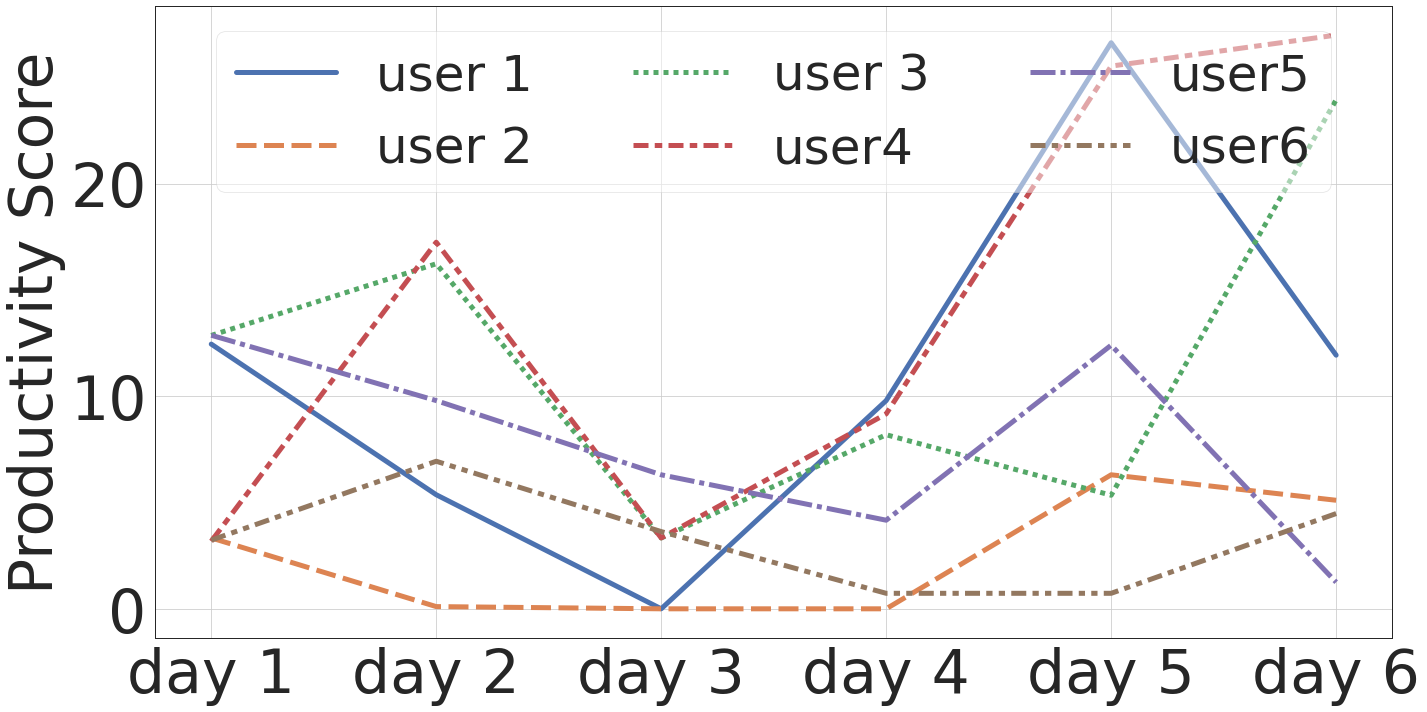

In [52]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_prod,x='day_id',y='score', hue='id',style='id')
# plt.yticks([0,1],[0,1])
plt.xlabel("")
plt.ylabel("Productivity Score")
# plt.ylabel('Precision (%)')
# plt.xlabel('Lag Window (in minutes)')
plt.legend(ncol=3, loc='upper center', labels=['user 1','user 2','user 3','user4','user5','user6'], fontsize=50)
# plt.ylim(0,100)

# plt.grid(False)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/productivity_plot_multiuser_v2.pdf",dpi=400,bbox_inches='tight')

In [117]:
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Precision', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_precision_temporal.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Recall', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_recall_temporal.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='F1-Score', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_f1_temporal.png", dpi=150, bbox_inches='tight')
#
# plt.figure(figsize=(20,10))
# sns.barplot(data=df_rq3,x='user',y='Jaccard', hue='label_source')
# plt.xticks(rotation=45,ha="right")
# plt.ylim(0,100)
# plt.savefig(f"{plotting_dir}/rq3_jaccard_temporal.png", dpi=150, bbox_inches='tight')

In [85]:
rq3c_experiments = ['p1_dataset_0.05_0.01_TAE',
                    'p2_dataset_0.05_0.01_TAE',
                    'p3_dataset_0.05_0.01_TAE',
                    'p4_dataset_0.05_0.01_TAE',
                    'p5_dataset_0.05_0.01_TAE',
                    'p6_dataset_0.05_0.01_TAE',
                    'p7_dataset_0.05_0.01_TAE',
                    'p10_dataset_0.05_0.01_TAE']
df_rq3c = None
for rq3c_exp in rq3c_experiments:
    exp_dir = f"{result_dir}/{rq3c_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/context_metrics.csv")
    df_exp_overall.columns = ['index','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']
    exp_user = rq3c_exp.split("_")[0]
    df_exp_overall['user'] = exp_user
    df_exp_overall = df_exp_overall[['user','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']]
    if df_rq3c is None:
        df_rq3c = df_exp_overall.copy(deep=True)
    else:
        df_rq3c = pd.concat([df_rq3c,df_exp_overall],ignore_index=True)
df_rq3c = df_rq3c.groupby('Context').mean()
df_rq3c.info()
df_rq3c

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ComingIn to Relaxing
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Onto-Precision      10 non-null     float64
 1   Onto-Recall         10 non-null     float64
 2   Temporal-Precision  10 non-null     float64
 3   Temporal-Recall     10 non-null     float64
 4   Combined-Precision  10 non-null     float64
 5   Combined-Recall     10 non-null     float64
dtypes: float64(6)
memory usage: 560.0+ bytes


,Onto-Precision,Onto-Recall,Temporal-Precision,Temporal-Recall,Combined-Precision,Combined-Recall
Context,,,,,,
ComingIn,100.00000,67.26875,87.20125,99.68000,87.20125,99.68000
Exercising,100.00000,93.25625,86.25500,99.42125,86.25500,99.42125
HavingMeal,98.21375,69.33750,72.34000,85.35125,72.34000,85.35125
HouseWork,100.00000,73.94625,55.06250,86.44500,58.61875,98.71250
InAMeeting,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MealPreparation,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
OfficeWork,100.00000,68.35000,84.69875,79.34500,84.77500,79.90625
PhoneCall,54.21625,31.84750,76.58000,56.47500,56.02750,56.71750
PreparingMeal,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [86]:
rq3d_experiments = ['mites_p1_dataset_0.05_0.01_TAE',
                    'mites_p2_dataset_0.05_0.01_TAE',
                    'mites_p3_dataset_0.05_0.01_TAE',
                    'mites_p4_dataset_0.05_0.01_TAE',
                    'mites_p5_dataset_0.05_0.01_TAE',
                    'mites_p6_dataset_0.05_0.01_TAE',
                    'mites_p7_dataset_0.05_0.01_TAE',
                    'mites_p10_dataset_0.05_0.01_TAE']
df_rq3d = None
for rq3d_exp in rq3d_experiments:
    exp_dir = f"{result_dir}/{rq3d_exp}"
    exp_contexts = json.load(open(f"{exp_dir}/all_contexts.json"))
    df_exp_overall = pd.read_csv(f"{exp_dir}/context_metrics.csv")
    df_exp_overall.columns = ['index','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']
    exp_user = rq3d_exp.split("_")[0]
    df_exp_overall['user'] = exp_user
    df_exp_overall = df_exp_overall[['user','Context','Onto-Precision','Onto-Recall','Temporal-Precision','Temporal-Recall','Combined-Precision','Combined-Recall']]
    if df_rq3d is None:
        df_rq3d = df_exp_overall.copy(deep=True)
    else:
        df_rq3d = pd.concat([df_rq3d,df_exp_overall],ignore_index=True)
df_rq3d = df_rq3d.groupby('Context').mean()
df_rq3d.info()
df_rq3d

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, ComingIn to Relaxing
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Onto-Precision      10 non-null     float64
 1   Onto-Recall         10 non-null     float64
 2   Temporal-Precision  10 non-null     float64
 3   Temporal-Recall     10 non-null     float64
 4   Combined-Precision  10 non-null     float64
 5   Combined-Recall     10 non-null     float64
dtypes: float64(6)
memory usage: 560.0+ bytes


,Onto-Precision,Onto-Recall,Temporal-Precision,Temporal-Recall,Combined-Precision,Combined-Recall
Context,,,,,,
ComingIn,20.69250,44.81875,13.11250,71.60250,15.23500,82.04750
Exercising,38.12500,26.78000,29.82125,35.18125,32.77500,43.74875
HavingMeal,19.36375,13.74250,14.06125,23.77375,13.85375,23.77375
HouseWork,21.47750,3.31250,26.58750,2.78125,23.69250,5.55000
InAMeeting,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MealPreparation,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
OfficeWork,55.95500,21.57375,52.41250,52.41125,53.05000,54.21250
PhoneCall,26.53750,10.35875,17.05875,22.28250,19.20250,22.98125
PreparingMeal,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [87]:
df_rq3c['label_source'] = 'GT'
df_rq3d['label_source'] = 'Mites'
rq3_ctx = pd.concat([df_rq3c, df_rq3d],ignore_index=False).reset_index()[['label_source','Context','Combined-Precision','Combined-Recall']]
rq3_ctx

,label_source,Context,Combined-Precision,Combined-Recall
0,GT,ComingIn,87.20125,99.68000
1,GT,Exercising,86.25500,99.42125
2,GT,HavingMeal,72.34000,85.35125
3,GT,HouseWork,58.61875,98.71250
4,GT,InAMeeting,0.00000,0.00000
5,GT,MealPreparation,0.00000,0.00000
6,GT,OfficeWork,84.77500,79.90625
7,GT,PhoneCall,56.02750,56.71750
8,GT,PreparingMeal,0.00000,0.00000
9,GT,Relaxing,46.02625,92.86875


In [88]:
rq3_ctx.round(2).to_csv(f"{plotting_dir}/rq3_ctx_table.csv",index=False)

In [89]:
rq3_ctx

,label_source,Context,Combined-Precision,Combined-Recall
0,GT,ComingIn,87.20125,99.68000
1,GT,Exercising,86.25500,99.42125
2,GT,HavingMeal,72.34000,85.35125
3,GT,HouseWork,58.61875,98.71250
4,GT,InAMeeting,0.00000,0.00000
5,GT,MealPreparation,0.00000,0.00000
6,GT,OfficeWork,84.77500,79.90625
7,GT,PhoneCall,56.02750,56.71750
8,GT,PreparingMeal,0.00000,0.00000
9,GT,Relaxing,46.02625,92.86875


# Distribution plots for incremental data

In [41]:
result_date = '20220914'
result_dir = f'results/{result_date}'
rq1bd_experiments = [
                    'casas_csh101_1days_5_1_TAE',
                    'casas_csh101_7days_5_1_TAE',
                    'casas_csh101_14days_5_1_TAE',
                    'casas_csh101_30days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_1days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_2days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_4days_5_1_TAE',
                    'extrasensory_0E6184E1-90C0-48EE-B25A-F1ECB7B9714E_6days_5_1_TAE']

df_rq1bd = None
for rq1bd_exp in rq1bd_experiments:
    exp_dir = f"{result_dir}/{rq1bd_exp}"
    exp_compiled_results_dict = pickle.load(open(f"{exp_dir}/compiled_results.pb","rb"))
    user_id = list(exp_compiled_results_dict.keys())[0]
    days = int(rq1bd_exp.split("_")[-4].split("days")[0])
    dataset  =rq1bd_exp.split("_")[0]
    user_results = exp_compiled_results_dict[user_id]
    user_results = user_results[['id','timestamp','gt_context','combined_context']]
    user_results.columns = ['id','timestamp','gt','prediction']
    user_results['days'] = days
    user_results['dataset'] = dataset

    # get gt counts
    user_results_gt = user_results.drop('prediction',axis=1)
    context_list = ['Amusement', 'ComingIn', 'Commuting', 'Exercising', 'GoingOut', 'HavingMeal', 'HouseWork', 'Inactivity',
                    'Meal_Preparation', 'None', 'OfficeWork', 'OnAPhoneCall', 'PhoneCall', 'PreparingMeal', 'Relaxing',
                    'Sleeping', 'UsingBathroom',"InAMeeting"]
    user_results_gt['val'] = 1
    user_results_gt=  user_results_gt.groupby(['id','days','dataset','gt'],as_index=False)['val'].sum()
    for context in context_list:
        user_results_gt[context] = user_results_gt.apply(lambda row: row['val'] if (context in row['gt']) else 0, axis=1)
    user_results_gt = user_results_gt.drop(['gt','val'],axis=1).groupby(['id','days','dataset'],as_index=False).sum()
    user_results_gt['type'] = 'gt'

    user_results_prediction = user_results.drop('gt',axis=1)
    context_list = ['Amusement', 'ComingIn', 'Commuting', 'Exercising', 'GoingOut', 'HavingMeal', 'HouseWork', 'Inactivity',
                    'Meal_Preparation', 'None', 'OfficeWork', 'OnAPhoneCall', 'PhoneCall', 'PreparingMeal', 'Relaxing',
                    'Sleeping', 'UsingBathroom',"InAMeeting"]
    user_results_prediction['val'] = 1
    user_results_prediction=  user_results_prediction.groupby(['id','days','dataset','prediction'],as_index=False)['val'].sum()
    for context in context_list:
        user_results_prediction[context] = user_results_prediction.apply(lambda row: row['val'] if (context in row['prediction']) else 0, axis=1)
    user_results_prediction = user_results_prediction.drop(['prediction','val'],axis=1).groupby(['id','days','dataset'],as_index=False).sum()
    user_results_prediction['type'] = 'prediction'
    user_results = pd.concat([user_results_gt,user_results_prediction])
    if df_rq1bd is None:
        df_rq1bd = user_results.copy(deep=True)
    else:
        df_rq1bd = pd.concat([df_rq1bd, user_results])


In [43]:
df_rq1bd['total'] = df_rq1bd[context_list].sum(axis=1)
for context in context_list:
    df_rq1bd[context] = df_rq1bd[context]/df_rq1bd['total']
df_rq1bd

,id,days,dataset,Amusement,ComingIn,Commuting,Exercising,GoingOut,HavingMeal,HouseWork,Inactivity,Meal_Preparation,None,OfficeWork,OnAPhoneCall,PhoneCall,PreparingMeal,Relaxing,Sleeping,UsingBathroom,InAMeeting,type,total
0,csh101,1,casas,0.000000,0.000712,0.000000,0.0,0.002549,0.033290,0.006681,0.0,0.0,0.0,0.043087,0.0,0.006324,0.009749,0.302232,0.520563,0.074812,0.000000,gt,1.0
0,csh101,1,casas,0.000000,0.000000,0.000000,0.0,0.005218,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.002132,0.000000,0.100810,0.802492,0.089347,0.000000,prediction,1.0
0,csh101,7,casas,0.000000,0.000870,0.000000,0.0,0.002714,0.033144,0.006674,0.0,0.0,0.0,0.040374,0.0,0.006503,0.010035,0.287342,0.540921,0.071424,0.000000,gt,1.0
0,csh101,7,casas,0.000000,0.001893,0.000000,0.0,0.003534,0.009965,0.019972,0.0,0.0,0.0,0.007415,0.0,0.003637,0.003743,0.060779,0.849507,0.039556,0.000000,prediction,1.0
0,csh101,14,casas,0.000000,0.000081,0.000000,0.0,0.001947,0.031917,0.004974,0.0,0.0,0.0,0.037656,0.0,0.006839,0.011402,0.269008,0.573988,0.062189,0.000000,gt,1.0
0,csh101,14,casas,0.000000,0.000000,0.000000,0.0,0.026522,0.002363,0.004500,0.0,0.0,0.0,0.009018,0.0,0.005498,0.009192,0.080710,0.842860,0.019336,0.000000,prediction,1.0
0,csh101,30,casas,0.000000,0.000061,0.000000,0.0,0.003308,0.035832,0.006289,0.0,0.0,0.0,0.032564,0.0,0.009129,0.010283,0.284755,0.558736,0.059043,0.000000,gt,1.0
0,csh101,30,casas,0.000000,0.072107,0.000000,0.0,0.004029,0.029424,0.013986,0.0,0.0,0.0,0.029191,0.0,0.015225,0.014056,0.211584,0.557539,0.052860,0.000000,prediction,1.0
0,0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,1,extrasensory,0.451407,0.000000,0.035824,0.0,0.000000,0.031135,0.122731,0.0,0.0,0.0,0.000000,0.0,0.000000,0.087172,0.026862,0.208723,0.036146,0.000000,gt,1.0
0,0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,1,extrasensory,0.520264,0.309812,0.000000,0.0,0.000000,0.020341,0.000000,0.0,0.0,0.0,0.149582,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,prediction,1.0


In [44]:
df_rq1bd = pd.melt(df_rq1bd, id_vars=['id','dataset','days','type'], value_name='fraction',var_name='context')
df_rq1bd

,id,dataset,days,type,context,fraction
0,csh101,casas,1,gt,Amusement,0.0
1,csh101,casas,1,prediction,Amusement,0.0
2,csh101,casas,7,gt,Amusement,0.0
3,csh101,casas,7,prediction,Amusement,0.0
4,csh101,casas,14,gt,Amusement,0.0
...,...,...,...,...,...,...
299,0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,extrasensory,2,prediction,total,1.0
300,0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,extrasensory,4,gt,total,1.0
301,0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,extrasensory,4,prediction,total,1.0
302,0E6184E1-90C0-48EE-B25A-F1ECB7B9714E,extrasensory,6,gt,total,1.0


In [51]:
df_rq1bd.context.unique()
context_mappings = {
    'Amusement':'Amusement', 'ComingIn':'Coming in', 'Commuting':'Commuting', 'Exercising':'Exercising', 'GoingOut':'Going out',
       'HavingMeal':'Having meal', 'HouseWork':'House work', 'Inactivity':'Inactivity', 'Meal_Preparation':'Meal preparation',
       'None':'None', 'OfficeWork':'Office work', 'OnAPhoneCall':'On a phone call', 'PhoneCall':'On a phone call', 'PreparingMeal':'Preparing meal',
       'Relaxing':'Relaxing', 'Sleeping':'Sleeping', 'UsingBathroom':'Using bathroom', 'InAMeeting':'In a meeting', 'total':'total'
}

# CASAS GT distribution plot

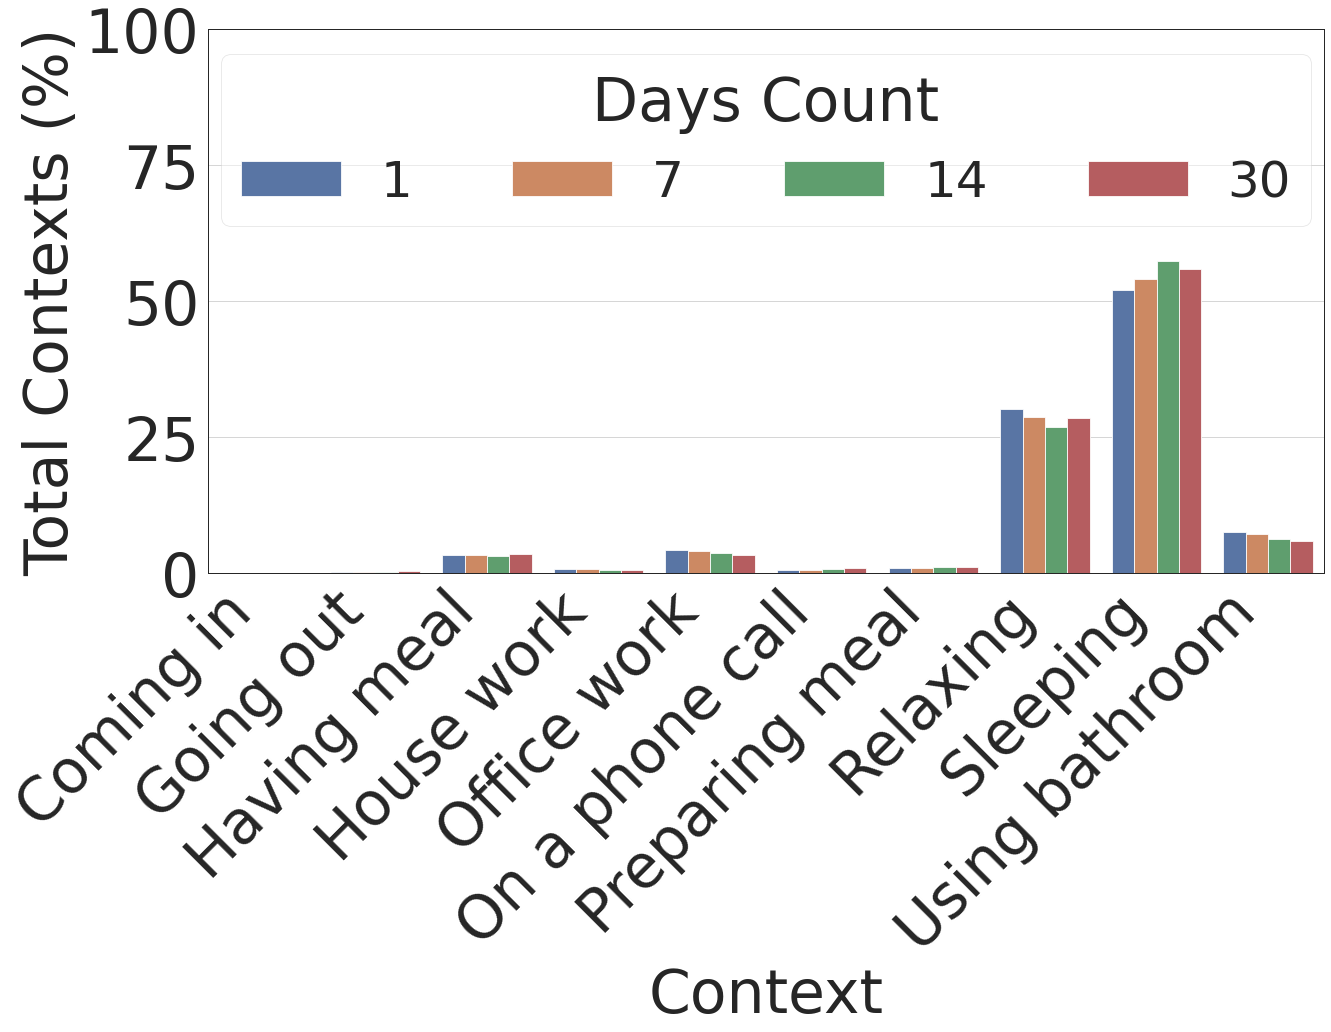

In [52]:
df_rq1bd_casas_gt = df_rq1bd[(df_rq1bd.id=='csh101') & (df_rq1bd.type=='gt')][['days','context','fraction']]
df_rq1bd_casas_gt = df_rq1bd_casas_gt.sort_values(by=['days','context'])
df_rq1bd_casas_gt = df_rq1bd_casas_gt[~(df_rq1bd_casas_gt.context=='total')]
printm("# CASAS GT distribution plot")
fig = plt.figure(figsize=(20,10))
df_rq1bd_casas_gt = df_rq1bd_casas_gt[df_rq1bd_casas_gt.fraction>0.]
df_rq1bd_casas_gt['fraction'] = df_rq1bd_casas_gt['fraction']*100
df_rq1bd_casas_gt['context'] = df_rq1bd_casas_gt['context'].apply(lambda x: context_mappings[x])
ax = sns.barplot(data=df_rq1bd_casas_gt,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Total Contexts (%)")
plt.ylim(0,100)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=50)
# plt.tight_layout()
plt.savefig(f"{plotting_dir}/casas_gt_distribution.pdf", dpi=400, bbox_inches='tight')

In [53]:
plotting_dir

'plots/20230728'

# Casas Prediction distribution plot

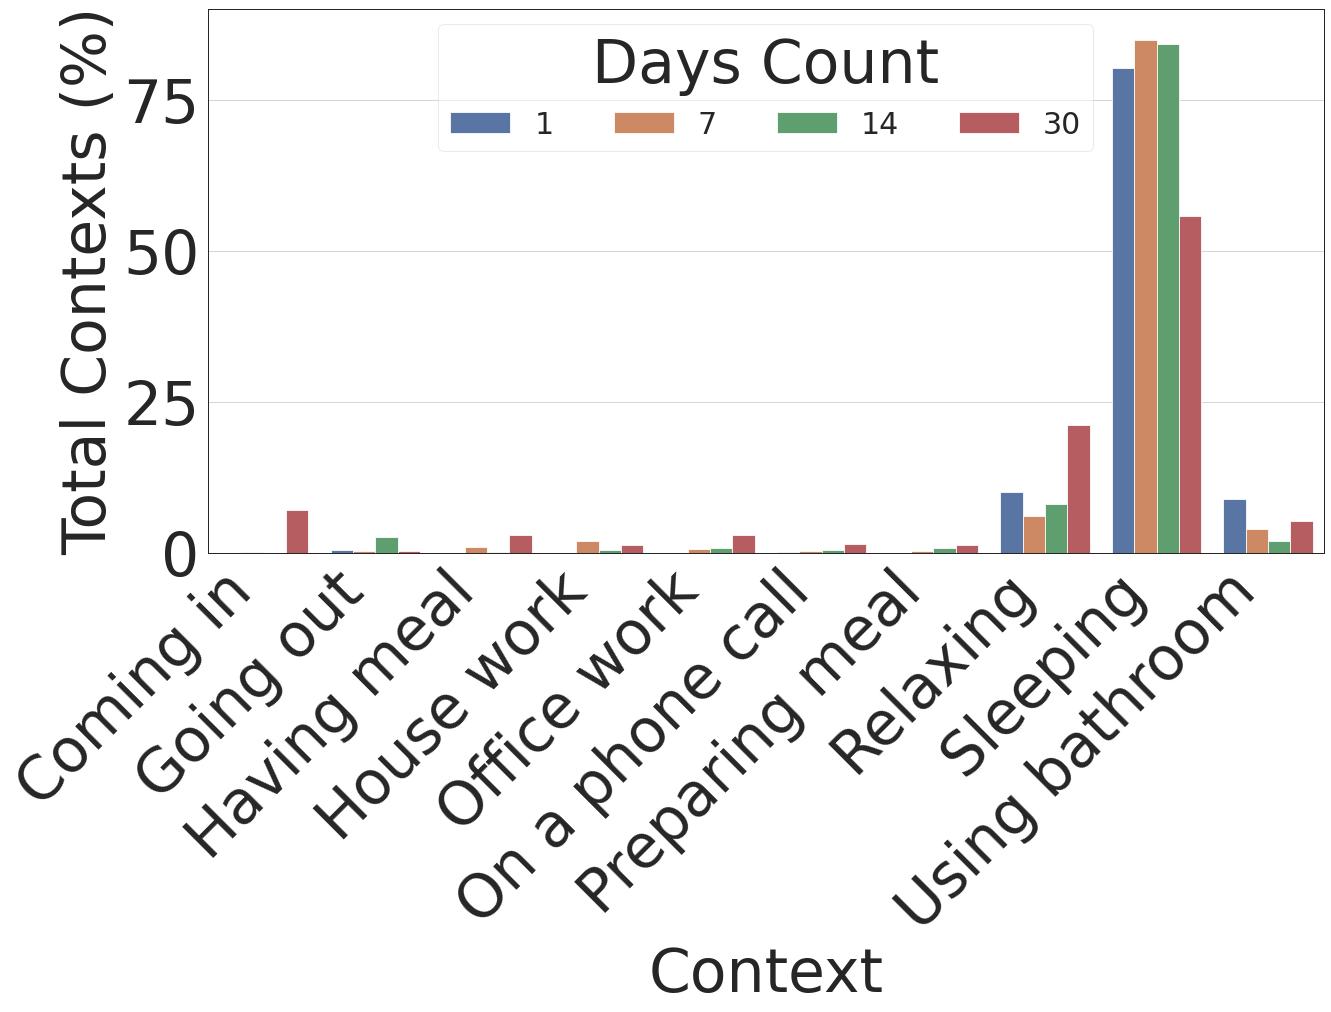

In [54]:
printm("# Casas Prediction distribution plot")
df_rq1bd_casas_pred = df_rq1bd[((df_rq1bd.id=='csh101')) & (df_rq1bd.type=='prediction')][['days','context','fraction']]

df_rq1bd_casas_pred = df_rq1bd_casas_pred[~(df_rq1bd_casas_pred.context=='total')]
fig = plt.figure(figsize=(20,10))
df_rq1bd_casas_pred = df_rq1bd_casas_pred[df_rq1bd_casas_pred.fraction>0.]
df_rq1bd_casas_pred = df_rq1bd_casas_pred.sort_values(by=['context','days'])
df_rq1bd_casas_pred['fraction'] = df_rq1bd_casas_pred['fraction']*100
df_rq1bd_casas_pred['context'] = df_rq1bd_casas_pred['context'].apply(lambda x: context_mappings[x])
ax = sns.barplot(data=df_rq1bd_casas_pred,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Total Contexts (%)")
plt.ylim(0,90)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=30)
plt.savefig(f"{plotting_dir}/casas_prediction_distribution.pdf", dpi=400, bbox_inches='tight')

# Extrasensory GT distribution plot

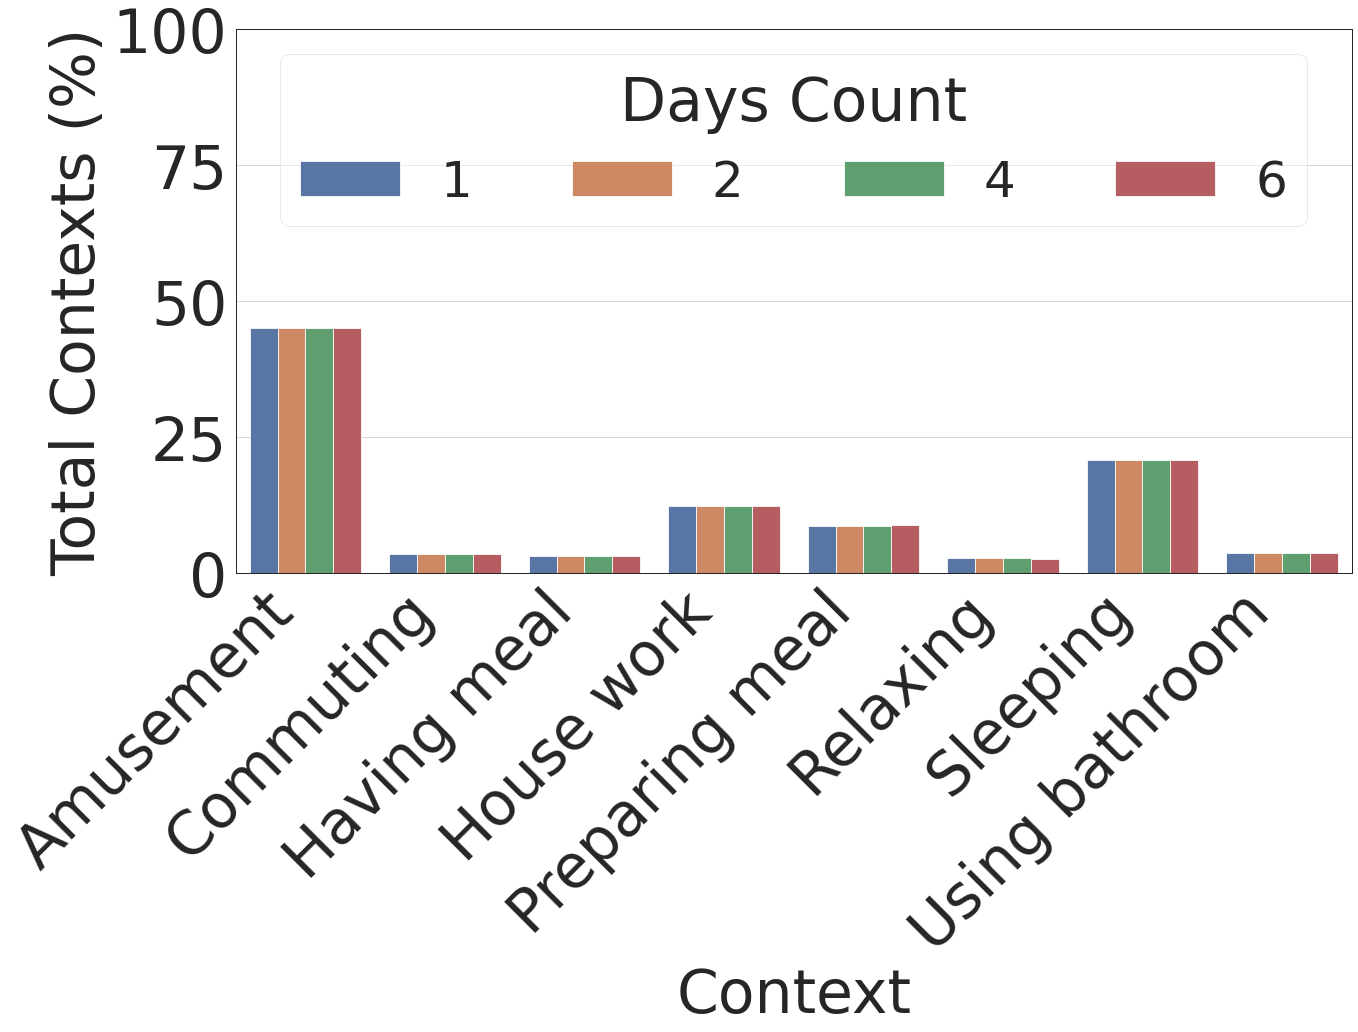

In [55]:
printm("# Extrasensory GT distribution plot")
df_rq1bd_extra_gt = df_rq1bd[(~(df_rq1bd.id=='csh101')) & (df_rq1bd.type=='gt')][['days','context','fraction']]
df_rq1bd_extra_gt = df_rq1bd_extra_gt.sort_values(by=['context','days'])
df_rq1bd_extra_gt = df_rq1bd_extra_gt[~(df_rq1bd_extra_gt.context=='total')]
fig = plt.figure(figsize=(20,10))
df_rq1bd_extra_gt = df_rq1bd_extra_gt[df_rq1bd_extra_gt.fraction>0.]
df_rq1bd_extra_gt['fraction'] = df_rq1bd_extra_gt['fraction']*100
df_rq1bd_extra_gt['context'] = df_rq1bd_extra_gt['context'].apply(lambda x: context_mappings[x])
ax = sns.barplot(data=df_rq1bd_extra_gt,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
plt.xlabel("Context")
plt.ylabel("Total Contexts (%)")
plt.ylim(0,100)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=50)
plt.savefig(f"{plotting_dir}/extra_gt_distribution.pdf", dpi=400, bbox_inches='tight')

# Extrasensory Prediction distribution plot

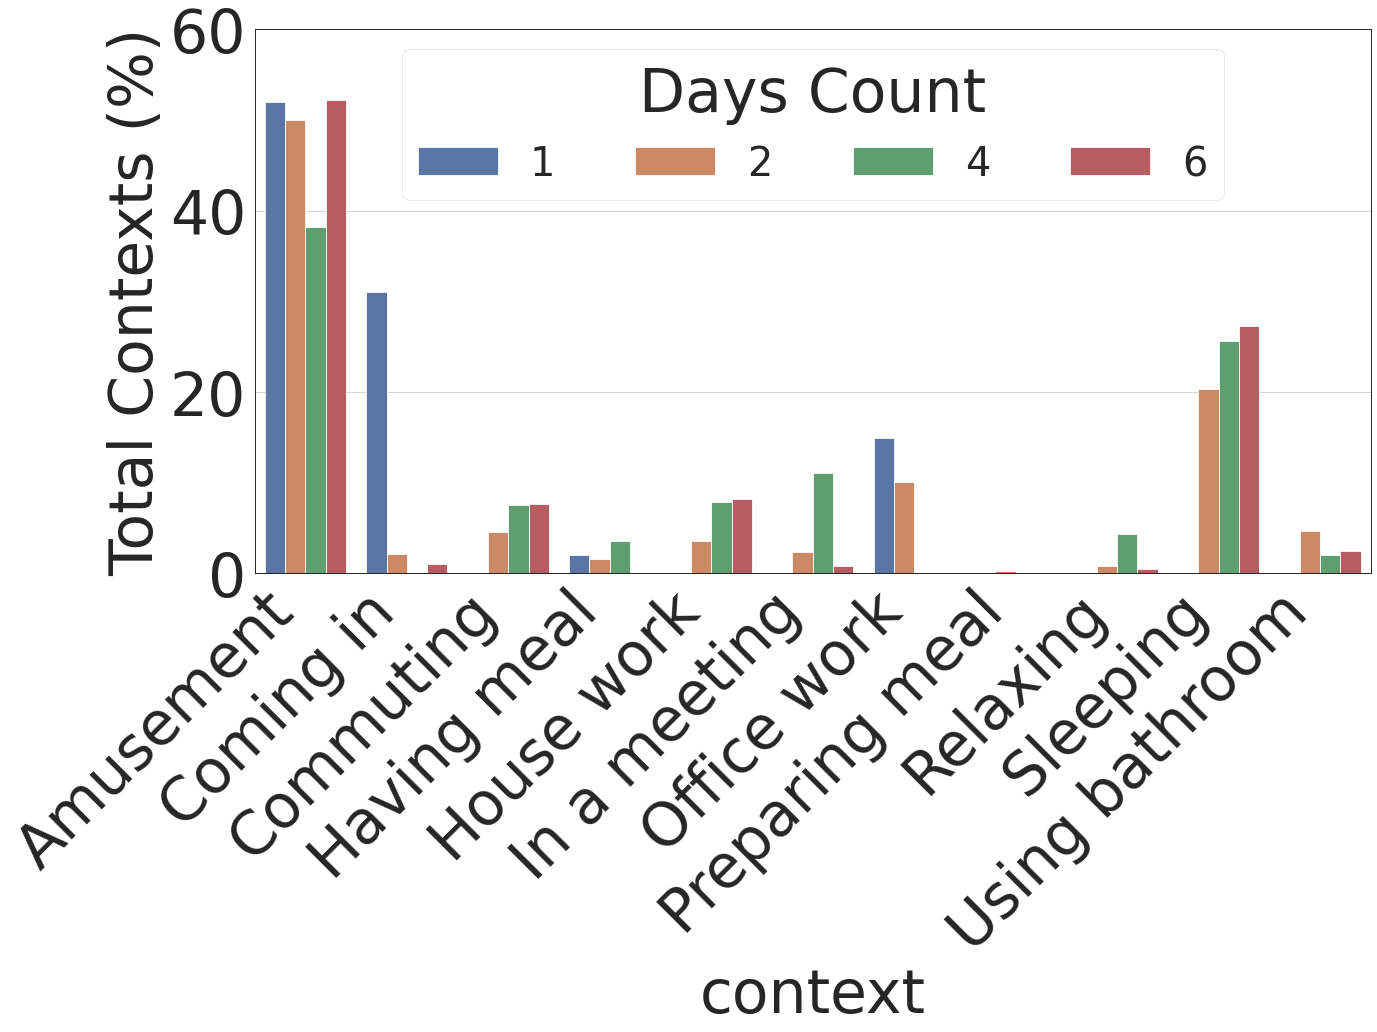

In [56]:
printm("# Extrasensory Prediction distribution plot")
df_rq1bd_extra_pred = df_rq1bd[(~(df_rq1bd.id=='csh101')) & (df_rq1bd.type=='prediction')][['days','context','fraction']]

df_rq1bd_extra_pred = df_rq1bd_extra_pred[~(df_rq1bd_extra_pred.context=='total')]
fig = plt.figure(figsize=(20,10))
df_rq1bd_extra_pred = df_rq1bd_extra_pred[df_rq1bd_extra_pred.fraction>0.]
df_rq1bd_extra_pred = df_rq1bd_extra_pred.sort_values(by=['context','days'])
df_rq1bd_extra_pred['fraction'] = df_rq1bd_extra_pred['fraction']*100
df_rq1bd_extra_pred['context'] = df_rq1bd_extra_pred['context'].apply(lambda x: context_mappings[x])
ax = sns.barplot(data=df_rq1bd_extra_pred,x='context',y='fraction', hue='days')
_ = plt.xticks(rotation=45, ha='right')
# plt.xlabel("Context")
# plt.ylabel("Presence (%)")
plt.ylabel("Total Contexts (%)")
plt.ylim(0,60)
_ = plt.legend(title="Days Count", loc='upper center',ncol=4, fontsize=40)
plt.savefig(f"{plotting_dir}/extra_pred_distribution.pdf", dpi=400, bbox_inches='tight')

## Application comparison with and with context prediction.

In [ ]:
            activities	    gt	   predicted
2015-10-20	0.187500	0.062500	0.065911
2015-10-21	0.062500	-0.125000	-0.103314
2015-10-22	0.062500	-0.125000	-0.122198
2015-10-23	0.062500	-0.062500	-0.046499
2015-10-24	0.062500	-0.125000	-0.122117
2015-10-25	0.062500	-0.125000	-0.124594


In [4]:
prod_dict_old = {'0BFC35E2-4817-4865-BFA7-764742302A2D': 
                                          {'2015-10-21': 
                                           {'Predicted Context': 0.18401331549516753,
                                           'Ground truth Context': 0.2167086328230432,
                                           'Activities Only': 0.63451577075874163},
                                           
                                          '2015-10-22': {'Predicted Context': 0.2825700844854071,
                                           'Ground truth Context': 0.0,
                                           'Activities Only': 0.4154759937422881},
                                           
                                          '2015-10-23': {'Predicted Context': 0.06664959016393444,
                                           'Ground truth Context': 0.057392473118279566,
                                           'Activities Only': 0.13185483870967743},
                                           
                                          '2015-10-24': {'Predicted Context': 0.03230472516875602,
                                           'Ground truth Context': 0.03730713596914176,
                                           'Activities Only': 0.10884763741562198},
                                           
                                          '2015-10-25': {'Predicted Context': 0.32145221884364533,
                                           'Ground truth Context': 0.30274986779481755,
                                           'Activities Only': 0.054761865415124254},
                                           
                                          '2015-10-26': {'Predicted Context': 0.0005208333333333313,
                                           'Ground truth Context': 0.3074595286153423,
                                           'Activities Only': 0.3060616774995988},
                                           
                                          '2015-10-27': {'Predicted Context': 0.02879704301075269,
                                           'Ground truth Context': 0.08768012956107879,
   'Activities Only': 0.2482796800634585}}}

In [17]:
prod_dict = {'0BFC35E2-4817-4865-BFA7-764742302A2D': 
                                          {'2015-10-21': {'productivity_score_pred': 0.18549023396677122,
   'productivity_score_gt': 0.21770431682653968,
   'productivity_score_activity': 0.63288938292083327},
  '2015-10-22': {'productivity_score_pred': 0.16225885515496521,
   'productivity_score_gt': 0.0,
   'productivity_score_activity': 0.42741226825209196},
  '2015-10-23': {'productivity_score_pred': 0.033316256830601104,
   'productivity_score_gt': 0.05734289617486339,
   'productivity_score_activity': 0.13927766393442622},
  '2015-10-24': {'productivity_score_pred': 0.03186354434319196,
   'productivity_score_gt': 0.03745803588134545,
   'productivity_score_activity': 0.09818861634450697},
  '2015-10-25': {'productivity_score_pred': 0.35340676229508196,
   'productivity_score_gt': 0.33027498677948175,
   'productivity_score_activity': 0.050175171866737166},
  '2015-10-26': {'productivity_score_pred': 0.29937469148088528,
   'productivity_score_gt': 0.3086554906474922,
   'productivity_score_activity': 0.4907779288290592},
  '2015-10-27': {'productivity_score_pred': 0.09485418870086373,
   'productivity_score_gt': 0.08768012956107879,
   'productivity_score_activity': 0.2374686012691698}}}


df_prod = pd.DataFrame.from_dict(prod_dict['0BFC35E2-4817-4865-BFA7-764742302A2D']).reset_index()
df_prod = pd.melt(df_prod, id_vars='index',var_name='Date',value_name='Productivity Score')
df_prod['Productivity Score'] = df_prod['Productivity Score']*100
df_prod

df_prod.groupby('index')['Productivity Score'].mean()

index
productivity_score_activity    29.659852
productivity_score_gt          14.844512
productivity_score_pred        16.579493
Name: Productivity Score, dtype: float64

# Extrasensory Productivity Barplot

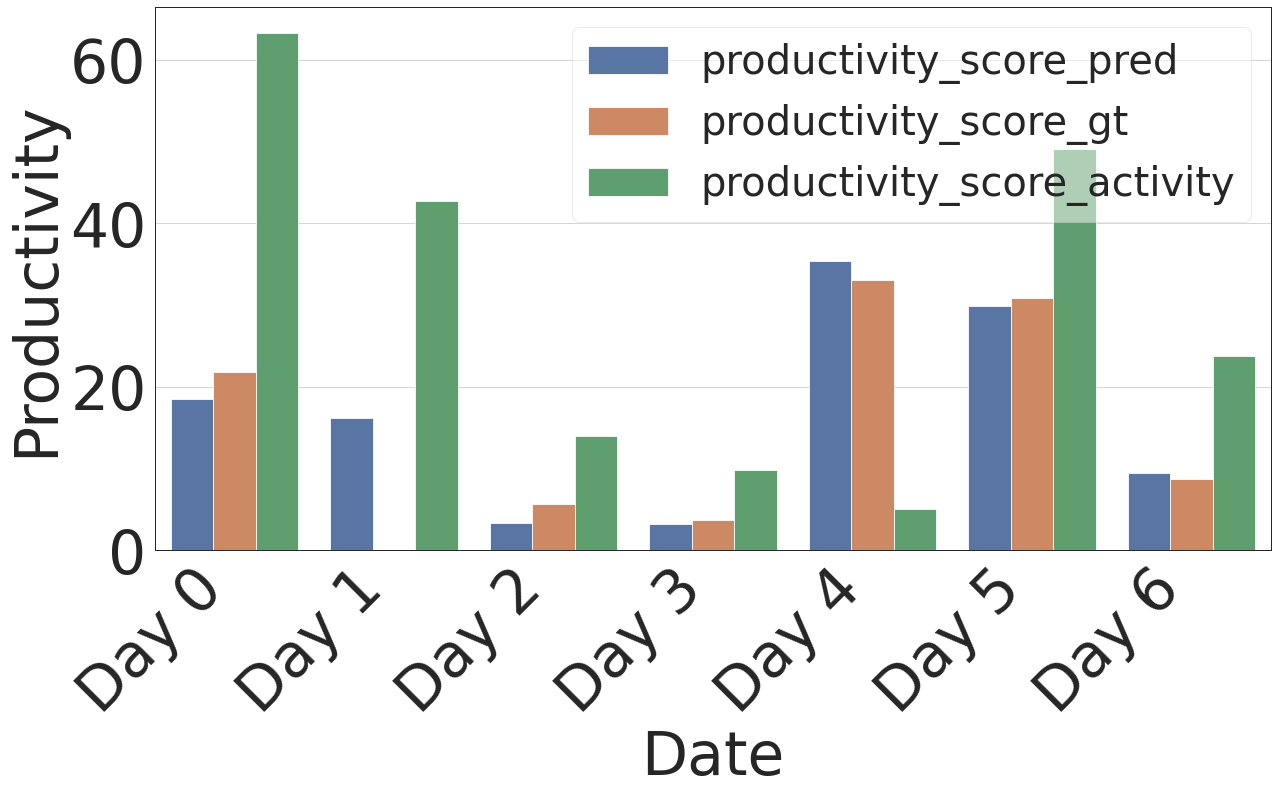

In [18]:
printm("# Extrasensory Productivity Barplot")
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_prod,x='Date',y='Productivity Score', hue='index')
_ = plt.xticks(rotation=45, ha='right')
# plt.xlabel("Context")
# plt.ylabel("Presence (%)")
plt.ylabel("Productivity")
plt.xticks(range(len(df_prod['Date'].unique())), [f'Day {i}' for i in range(len(df_prod.Date.unique()))])
_ = plt.legend(title="",loc='upper right', fontsize=40)
plt.savefig(f"{plotting_dir}/extra_pred_distribution.pdf", dpi=400, bbox_inches='tight')

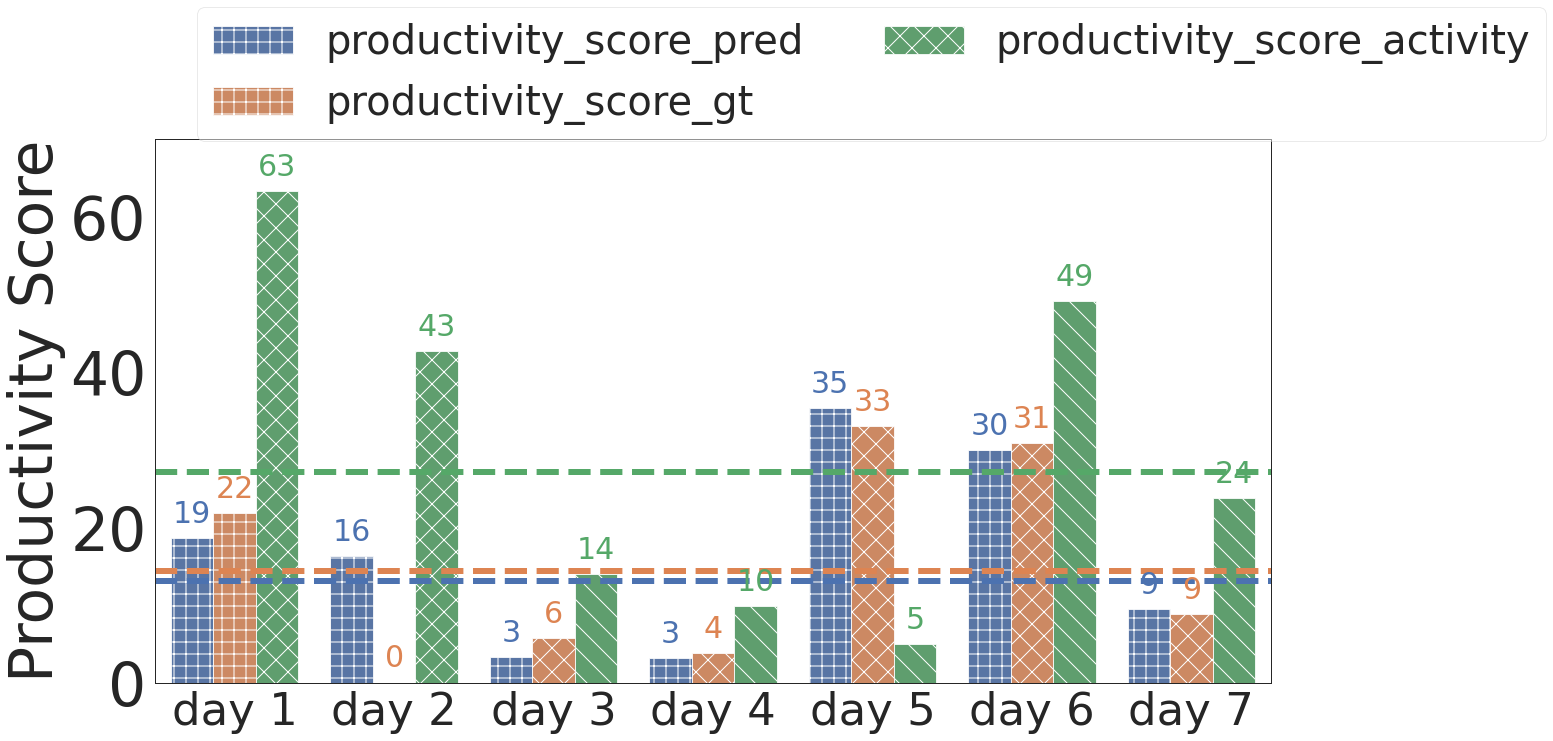

In [19]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_prod,x='Date',y='Productivity Score', hue='index')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
# plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=30, color=colors[i//7]) # sets horizontal alignment (ha) to center
# plt.legend(loc='upper right',fontsize=40)
plt.legend(ncol=2,fontsize=40,bbox_to_anchor=(0.02,1.28))
plt.xlabel('')
plt.xticks(range(len(df_prod['Date'].unique())), [f'day {i}' for i in range(1,len(df_prod.Date.unique())+1)],fontsize=45)

plt.axhline(y=13.090112,color='#4c72b0',linestyle='--',linewidth=6)
plt.axhline(y=14.418540,color='#dd8452',linestyle='--',linewidth=6)
plt.axhline(y=27.139964,color='#55a868',linestyle='--',linewidth=6)

plt.grid(False)
plt.ylabel('Productivity Score')
plt.ylim(0,70)

plt.savefig(f"{plotting_dir}/rq5_productivity.pdf", dpi=400, bbox_inches='tight')

In [288]:
Activities Only        27.139964
Groundtruth Context    14.418540
Predicted Context      13.090112

SyntaxError: invalid syntax (3298519252.py, line 1)

In [13]:
df_stress = pd.read_csv("../../cache/feb2023/stress_score_final.csv")
df_stress = df_stress[df_stress['user_id']=='0BFC35E2-4817-4865-BFA7-764742302A2D']
df_stress.columns = ['user_id','Date','Activities Only','Ground truth Context','Predicted Context']
df_stress = pd.melt(df_stress.drop('user_id',axis=1), id_vars = 'Date',var_name='index',value_name='Stress Score')
df_stress['Stress Score'] = df_stress['Stress Score'].apply(lambda x: x-df_stress['Stress Score'].min()/(df_stress['Stress Score'].max()-df_stress['Stress Score'].min()))*100
# df_stress = df_stress.sort_values(by=['index'],key=lambda x: 0 if x=='Predicted Context' else 1 if x=='Groundtruth Context' else 2)
df_stress =df_stress.iloc[::-1]
df_stress = df_stress[df_stress.Date.isin(df_prod.Date)]
df_stress

,Date,index,Stress Score
23,2015-10-27,Predicted Context,34.018031
22,2015-10-26,Predicted Context,28.762995
21,2015-10-25,Predicted Context,27.540611
20,2015-10-24,Predicted Context,27.788337
19,2015-10-23,Predicted Context,35.350065
18,2015-10-22,Predicted Context,27.780214
17,2015-10-21,Predicted Context,29.668616
15,2015-10-27,Ground truth Context,33.750000
14,2015-10-26,Ground truth Context,33.750000
13,2015-10-25,Ground truth Context,27.500000


In [20]:
df_stress = pd.read_csv("../../cache/feb2023/stress_score_final_may13.csv")
df_stress = df_stress[df_stress['user_id']=='0BFC35E2-4817-4865-BFA7-764742302A2D']
df_stress.columns = ['user_id','Date','Activities Only','Ground truth Context','Predicted Context']
df_stress = pd.melt(df_stress.drop('user_id',axis=1), id_vars = 'Date',var_name='index',value_name='Stress Score')
df_stress['Stress Score'] = df_stress['Stress Score'].apply(lambda x: x-df_stress['Stress Score'].min()/(df_stress['Stress Score'].max()-df_stress['Stress Score'].min()))*100
# df_stress = df_stress.sort_values(by=['index'],key=lambda x: 0 if x=='Predicted Context' else 1 if x=='Groundtruth Context' else 2)
df_stress =df_stress.iloc[::-1]
df_stress = df_stress[df_stress.Date.isin(df_prod.Date)]
df_stress

,Date,index,Stress Score
23,2015-10-27,Predicted Context,34.316493
22,2015-10-26,Predicted Context,28.958024
21,2015-10-25,Predicted Context,27.537147
20,2015-10-24,Predicted Context,27.555721
19,2015-10-23,Predicted Context,34.520802
18,2015-10-22,Predicted Context,27.927192
17,2015-10-21,Predicted Context,30.044577
15,2015-10-27,Ground truth Context,33.750000
14,2015-10-26,Ground truth Context,33.750000
13,2015-10-25,Ground truth Context,27.500000


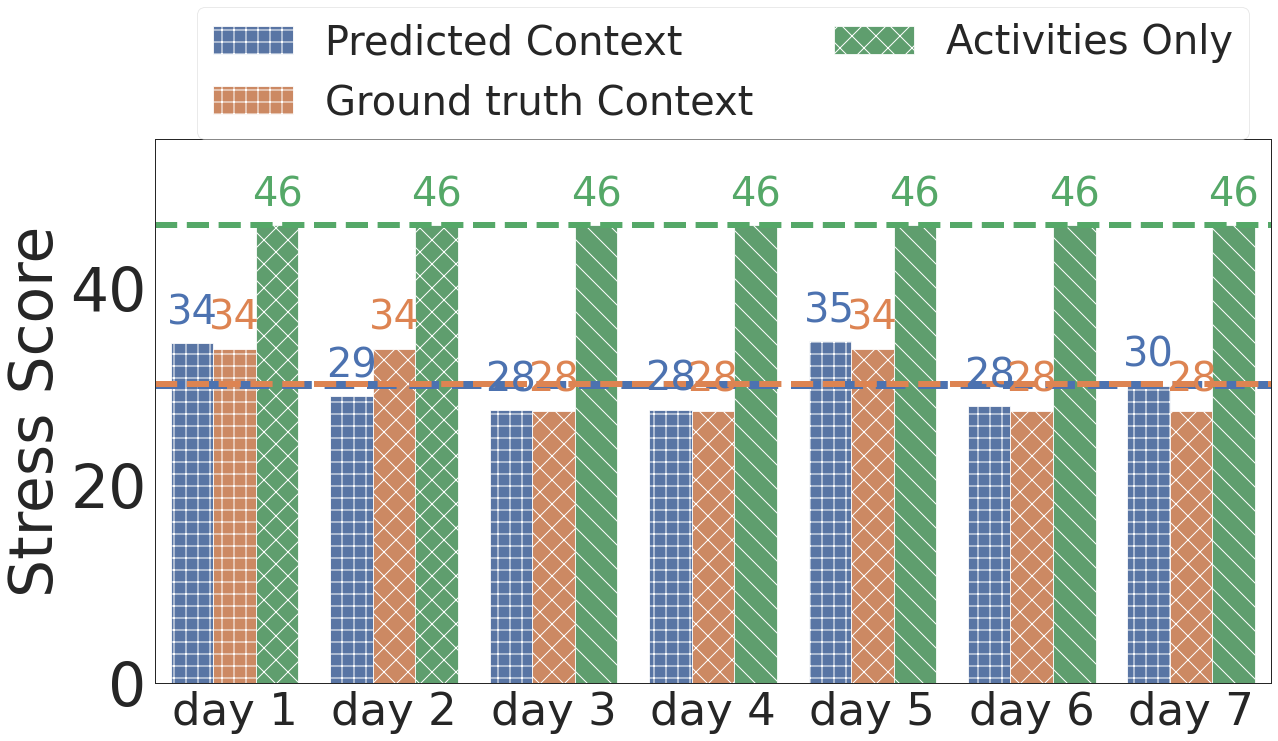

In [21]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_stress,x='Date',y='Stress Score', hue='index')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']
# plt.ylim(0,100)
# Define some hatches
hatches = ['-', '+', 'x', '\\', '*', 'o'][1:]
# for i,p in enumerate(ax.patches):
#     height = p.get_height() # height of each horizontal bar is the same
#     width = p.get_width() # width (average number of passengers)
#     p.set_hatch(hatches[i//2)
#
#     # adding text to each bar
#     ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
#             y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
#             s = "{:.0f}".format(width), # data label, formatted to ignore decimals
#             va = "center", size=60, color=colors[i//2]) # sets vertical alignment (va) to center
#
for i,p in enumerate(ax.patches):
    # get the height of each bar
    height = p.get_height()
    p.set_hatch(hatches[i//8])
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
            y = height+2, # y-coordinate position of data label, padded 100 above bar
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center', size=40, color=colors[i//7]) # sets horizontal alignment (ha) to center
# plt.legend(ncol=2,fontsize=36,bbox_to_anchor=(0.05,1.25))
# plt.legend(ncol=3,fontsize=28,bbox_to_anchor=(-0.012,1.12))
plt.legend(ncol=2,fontsize=40,bbox_to_anchor=(0.02,1.28))
# plt.legend(loc='upper right',fontsize=40)
plt.xlabel('')
plt.xticks(range(len(df_prod['Date'].unique())), [f'day {i}' for i in range(1,len(df_prod.Date.unique())+1)],fontsize=45)

plt.axhline(y=30.12,color='#4c72b0',linestyle='--',linewidth=8)
plt.axhline(y=30.17,color='#dd8452',linestyle='--',linewidth=6)
plt.axhline(y=46.2500,color='#55a868',linestyle='--',linewidth=6)

plt.grid(False)
plt.ylabel('Stress Score')
plt.ylim(0,55)

plt.savefig(f"{plotting_dir}/rq5_stress.pdf", dpi=400, bbox_inches='tight')


In [200]:
df_stress.groupby('index')['Stress Score'].mean()

index
Activities Only        46.250000
Groundtruth Context    30.178571
Predicted Context      30.129838
Name: Stress Score, dtype: float64

In [209]:
plotting_dir

'plots/20230215'